In [1]:
import pandas as pd

In [2]:

f = pd.read_excel('/Users/evelynzhang/Downloads/GuttmacherInstituteAbortionDataByState.xlsx', engine='openpyxl')
df=f

In [3]:
df.columns

Index(['U.S. State', '% change in abortion rate, 2017-2020',
       '% change in the no. of abortion clinics, 2017-2020',
       '% change in the no. of abortion providers, 2014-2017',
       '% of all U.S. abortions, by state of occurrence, 2020',
       '% of counties without a known abortion provider, 2014',
       '% of counties without a known clinic, 2020',
       '% of residents obtaining abortions who traveled out of state for care, 2020',
       '% of women aged 15-44 living in a county without a clinic, 2020',
       '% of women aged 15-44 living in a county without an abortion provider, 2014',
       'Abortion rate (the no. of abortions per 1,000 women aged 15-17), by state of residence, 2017',
       'Abortion rate (the no. of abortions per 1,000 women aged 15-19), by state of residence, 2017',
       'Abortion rate (the no. of abortions per 1,000 women aged 18-19), by state of residence, 2017',
       'Change in the no. of abortion clinics, 2017-2020',
       'Change in th

🟠 Proposition 1: “Teen abortion rates are highest in states with the fewest restrictions.”
Support side: States with higher teen abortion rates tend to have more access (more clinics, fewer provider gaps).

Opposition side: Teen abortion rate may correlate more with education, poverty, or birthrate than with access alone.

Relevant columns:

Abortion rate (the no. of abortions per 1,000 women aged 15–17)

No. of abortion clinics, 2020

% of counties without a known clinic, 2020

% of residents obtaining abortions who traveled out of state for care, 2020

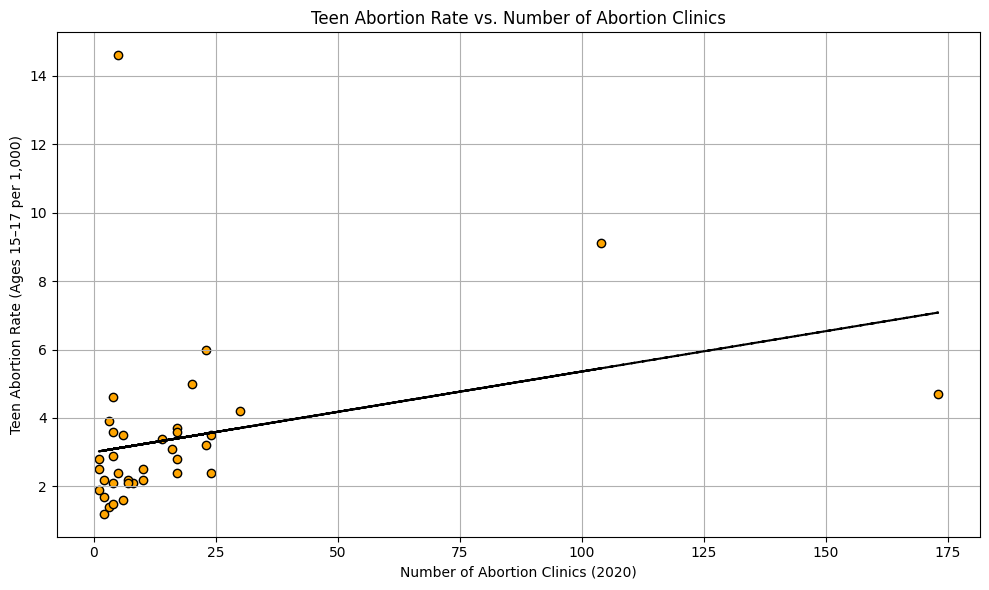

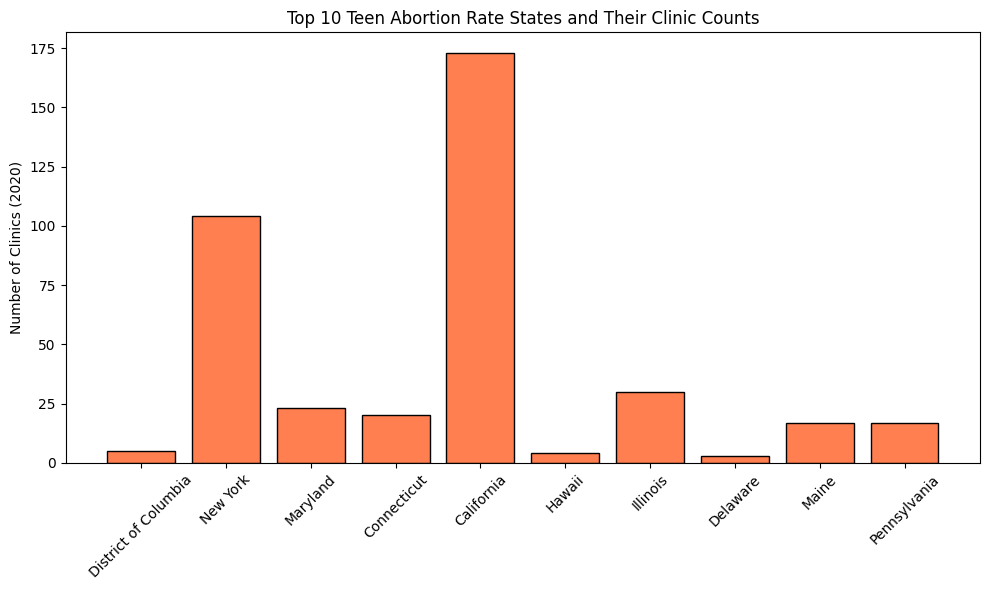

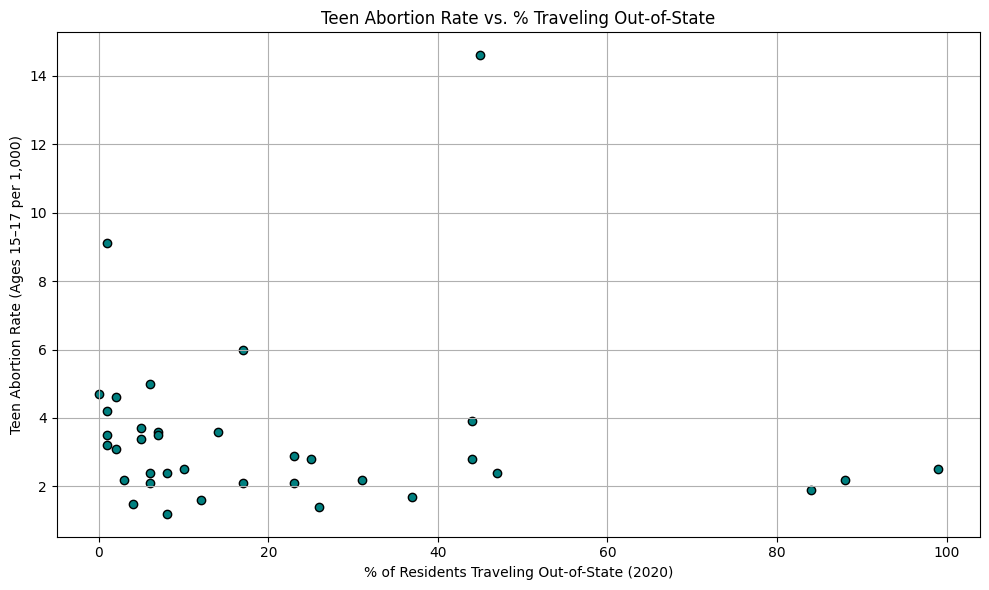

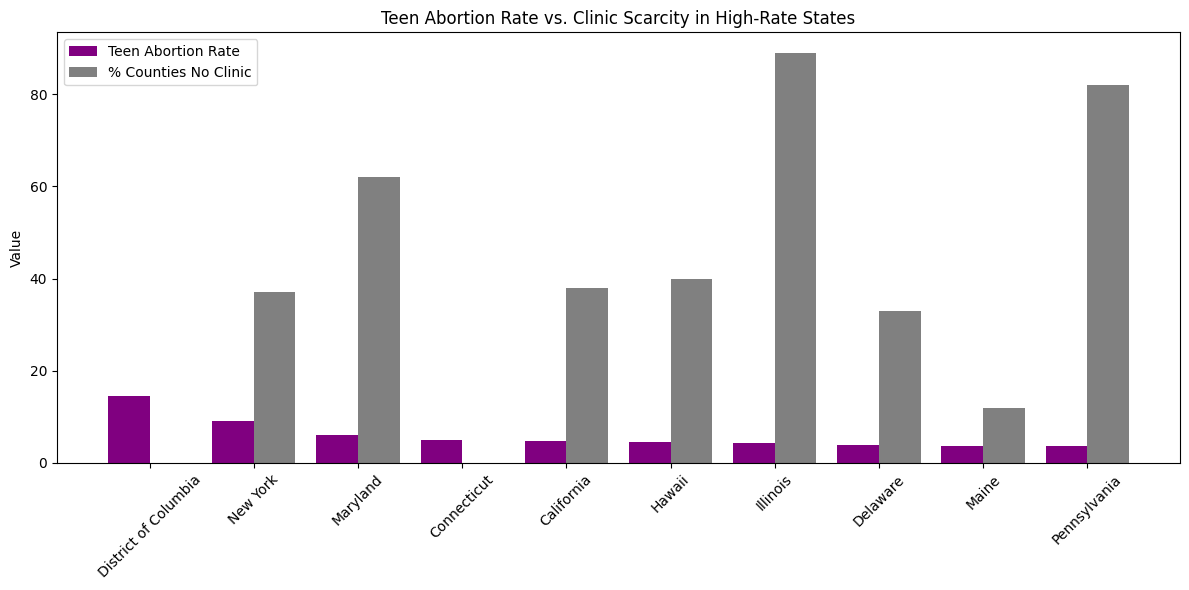

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Assume  is already loaded
df.columns = df.columns.str.strip()

# Select and clean relevant columns
df_teen = df[[
    'U.S. State',
    'Abortion rate (the no. of abortions per 1,000 women aged 15-17), by state of residence, 2017',
    'No. of abortion clinics, 2020',
    '% of counties without a known clinic, 2020',
    '% of residents obtaining abortions who traveled out of state for care, 2020'
]].dropna()

df_teen.columns = [
    'State',
    'Teen_Rate_15_17',
    'Clinics_2020',
    'Pct_Counties_No_Clinic',
    'Pct_Out_of_State'
]

# Convert columns to numeric
for col in ['Teen_Rate_15_17', 'Clinics_2020', 'Pct_Counties_No_Clinic', 'Pct_Out_of_State']:
    df_teen[col] = pd.to_numeric(df_teen[col], errors='coerce')

df_teen = df_teen.dropna()

# ---------------- Viz 1: Scatterplot – Teen Rate vs. Clinics ----------------
plt.figure(figsize=(10, 6))
x = df_teen['Clinics_2020']
y = df_teen['Teen_Rate_15_17']

plt.scatter(x, y, color='orange', edgecolor='black')
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b, color='black', linestyle='--')  # regression line
plt.title("Teen Abortion Rate vs. Number of Abortion Clinics")
plt.xlabel("Number of Abortion Clinics (2020)")
plt.ylabel("Teen Abortion Rate (Ages 15–17 per 1,000)")
plt.grid(True)
plt.tight_layout()
plt.show()

# ---------------- Viz 2: Bar Chart – Top Teen Abortion Rate States ----------------
top_teen = df_teen.sort_values('Teen_Rate_15_17', ascending=False).head(10)

plt.figure(figsize=(10, 6))
plt.bar(top_teen['State'], top_teen['Clinics_2020'], color='coral', edgecolor='black')
plt.title("Top 10 Teen Abortion Rate States and Their Clinic Counts")
plt.ylabel("Number of Clinics (2020)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# ---------------- Viz 3: Scatterplot – Teen Rate vs. % Traveling Out of State ----------------
plt.figure(figsize=(10, 6))
x = df_teen['Pct_Out_of_State']
y = df_teen['Teen_Rate_15_17']

plt.scatter(x, y, color='teal', edgecolor='black')
plt.title("Teen Abortion Rate vs. % Traveling Out-of-State")
plt.xlabel("% of Residents Traveling Out-of-State (2020)")
plt.ylabel("Teen Abortion Rate (Ages 15–17 per 1,000)")
plt.grid(True)
plt.tight_layout()
plt.show()

# ---------------- Viz 4: Side-by-Side Bar – Teen Rate vs. % Counties Without Clinics ----------------
top_states = df_teen.sort_values('Teen_Rate_15_17', ascending=False).head(10)

bar_width = 0.4
indices = np.arange(len(top_states))

plt.figure(figsize=(12, 6))
plt.bar(indices, top_states['Teen_Rate_15_17'], width=bar_width, label='Teen Abortion Rate', color='purple')
plt.bar(indices + bar_width, top_states['Pct_Counties_No_Clinic'], width=bar_width, label='% Counties No Clinic', color='gray')

plt.xticks(indices + bar_width / 2, top_states['State'], rotation=45)
plt.title("Teen Abortion Rate vs. Clinic Scarcity in High-Rate States")
plt.ylabel("Value")
plt.legend()
plt.tight_layout()
plt.show()


In [3]:
df.columns

Index(['U.S. State', '% change in abortion rate, 2017-2020',
       '% change in the no. of abortion clinics, 2017-2020',
       '% change in the no. of abortion providers, 2014-2017',
       '% of all U.S. abortions, by state of occurrence, 2020',
       '% of counties without a known abortion provider, 2014',
       '% of counties without a known clinic, 2020',
       '% of residents obtaining abortions who traveled out of state for care, 2020',
       '% of women aged 15-44 living in a county without a clinic, 2020',
       '% of women aged 15-44 living in a county without an abortion provider, 2014',
       'Abortion rate (the no. of abortions per 1,000 women aged 15-17), by state of residence, 2017',
       'Abortion rate (the no. of abortions per 1,000 women aged 15-19), by state of residence, 2017',
       'Abortion rate (the no. of abortions per 1,000 women aged 18-19), by state of residence, 2017',
       'Change in the no. of abortion clinics, 2017-2020',
       'Change in th

In [4]:

import pandas as pd

# Load existing abortion dataset
f = pd.read_excel('/Users/evelynzhang/Downloads/GuttmacherInstituteAbortionDataByState.xlsx', engine='openpyxl')
df=f
# Remove leading/trailing spaces from column names
df.columns = df.columns.str.strip()

# Identify columns that should be numeric (all except these)
non_numeric_cols = ['U.S. State', 'Party']
numeric_cols = [col for col in df.columns if col not in non_numeric_cols]

# Convert all numeric-looking columns to actual numbers
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')  # 'Unavailable' becomes NaN





# Add a party control map (as of 2020 presidential election or recent governor)
party_map = {
    'Alabama': 'Republican', 'Alaska': 'Republican', 'Arizona': 'Democratic', 'Arkansas': 'Republican',
    'California': 'Democratic', 'Colorado': 'Democratic', 'Connecticut': 'Democratic', 'Delaware': 'Democratic',
    'Florida': 'Republican', 'Georgia': 'Republican', 'Hawaii': 'Democratic', 'Idaho': 'Republican',
    'Illinois': 'Democratic', 'Indiana': 'Republican', 'Iowa': 'Republican', 'Kansas': 'Democratic',
    'Kentucky': 'Democratic', 'Louisiana': 'Democratic', 'Maine': 'Democratic', 'Maryland': 'Democratic',
    'Massachusetts': 'Democratic', 'Michigan': 'Democratic', 'Minnesota': 'Democratic', 'Mississippi': 'Republican',
    'Missouri': 'Republican', 'Montana': 'Republican', 'Nebraska': 'Republican', 'Nevada': 'Democratic',
    'New Hampshire': 'Republican', 'New Jersey': 'Democratic', 'New Mexico': 'Democratic', 'New York': 'Democratic',
    'North Carolina': 'Democratic', 'North Dakota': 'Republican', 'Ohio': 'Republican', 'Oklahoma': 'Republican',
    'Oregon': 'Democratic', 'Pennsylvania': 'Democratic', 'Rhode Island': 'Democratic', 'South Carolina': 'Republican',
    'South Dakota': 'Republican', 'Tennessee': 'Republican', 'Texas': 'Republican', 'Utah': 'Republican',
    'Vermont': 'Democratic', 'Virginia': 'Democratic', 'Washington': 'Democratic', 'West Virginia': 'Republican',
    'Wisconsin': 'Democratic', 'Wyoming': 'Republican', 'District of Columbia': 'Democratic'
}

# Add party column
df['Party'] = df['U.S. State'].map(party_map)

# Filter and keep relevant columns for analysis
cols_to_keep = [
    'U.S. State',
    'Party',
    'No. of abortion clinics, 2020',
    '% of counties without a known clinic, 2020',
    '% of residents obtaining abortions who traveled out of state for care, 2020',
    'Abortion rate (the no. of abortions per 1,000 women aged 15-17), by state of residence, 2017',
    'No. of abortions per 1,000 women aged 15–44, by state of occurrence, 2020'
]

df_ideology = df[cols_to_keep].dropna()

# Rename columns for ease of plotting
df_ideology.columns = [
    'State', 'Party', 'Clinics_2020', 'Pct_No_Clinic_Counties',
    'Pct_Travel_OutOfState', 'Teen_Rate_15_17', 'Abortion_Rate_15_44'
]




In [5]:
df_ideology

,State,Party,Clinics_2020,Pct_No_Clinic_Counties,Pct_Travel_OutOfState,Teen_Rate_15_17,Abortion_Rate_15_44
0,Alabama,Republican,5,93,47,2.4,6.0
1,Alaska,Republican,4,87,7,3.6,8.6
2,Arizona,Democratic,8,80,6,2.1,9.3
3,Arkansas,Republican,2,99,37,1.7,5.6
4,California,Democratic,173,38,0,4.7,19.2
5,Colorado,Democratic,23,77,1,3.2,11.2
6,Connecticut,Democratic,20,0,6,5.0,16.7
7,Delaware,Democratic,3,33,44,3.9,10.0
8,District of Columbia,Democratic,5,0,45,14.6,48.9
10,Georgia,Republican,14,95,5,3.4,18.9


<Figure size 800x600 with 0 Axes>

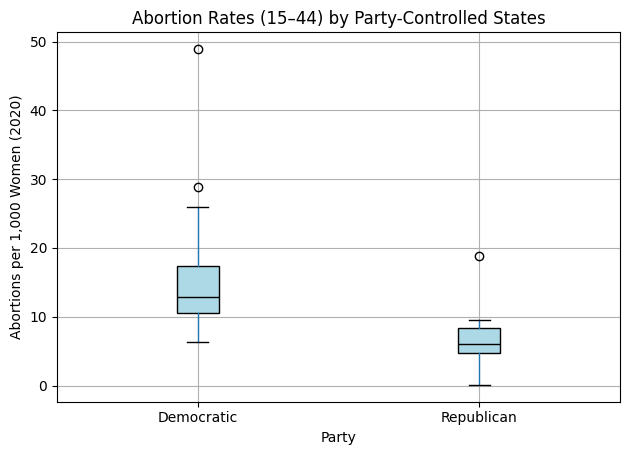

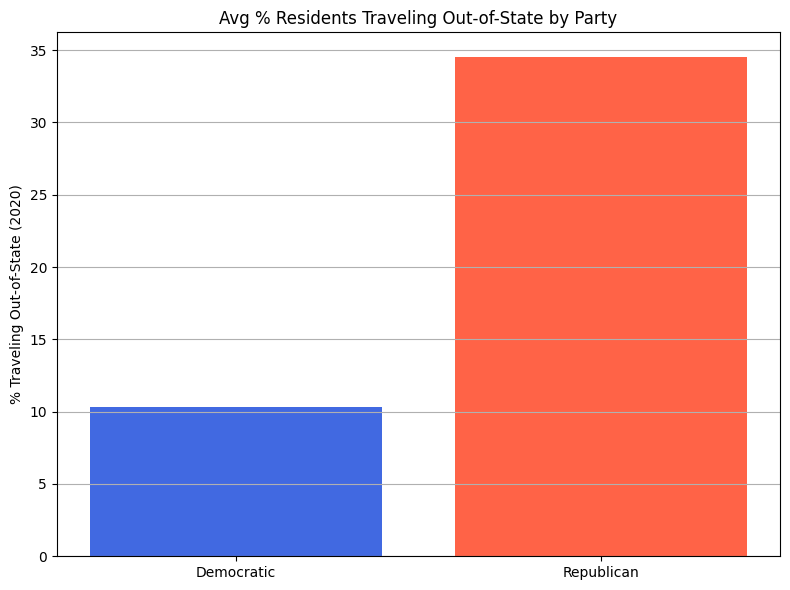

<Figure size 800x600 with 0 Axes>

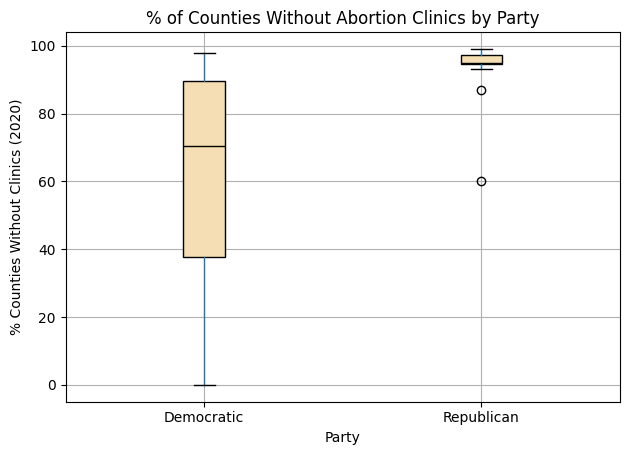

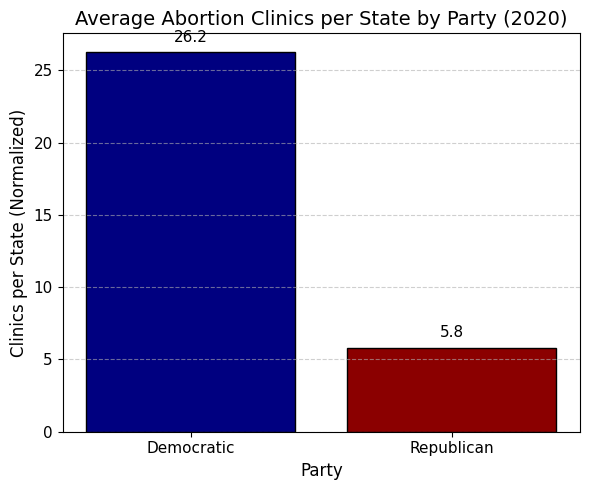

In [89]:
import matplotlib.pyplot as plt
import numpy as np

# ---------------- Viz 1: Boxplot – Abortion Rate by Party ----------------
plt.figure(figsize=(8, 6))
df_ideology.boxplot(column='Abortion_Rate_15_44', by='Party', patch_artist=True,
                    boxprops=dict(facecolor='lightblue'), medianprops=dict(color='black'))
plt.title("Abortion Rates (15–44) by Party-Controlled States")
plt.suptitle("")
plt.xlabel("Party")
plt.ylabel("Abortions per 1,000 Women (2020)")
plt.grid(True)
plt.tight_layout()
plt.show()

# ---------------- Viz 2: Bar – Avg % Traveling Out-of-State by Party ----------------
party_travel = df_ideology.groupby('Party')['Pct_Travel_OutOfState'].mean().sort_values()

plt.figure(figsize=(8, 6))
plt.bar(party_travel.index, party_travel.values, color=['royalblue', 'tomato'])
plt.title("Avg % Residents Traveling Out-of-State by Party")
plt.ylabel("% Traveling Out-of-State (2020)")
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# ---------------- Viz 3: Boxplot – % Counties Without Clinics by Party ----------------
plt.figure(figsize=(8, 6))
df_ideology.boxplot(column='Pct_No_Clinic_Counties', by='Party', patch_artist=True,
                    boxprops=dict(facecolor='wheat'), medianprops=dict(color='black'))
plt.title("% of Counties Without Abortion Clinics by Party")
plt.suptitle("")
plt.xlabel("Party")
plt.ylabel("% Counties Without Clinics (2020)")
plt.grid(True)
plt.tight_layout()
plt.show()

# ---------------- Viz 4: Bar Chart – Total Clinics by Party ----------------


import matplotlib.pyplot as plt

# Recalculate if needed
party_groups = df_ideology.groupby('Party')
total_clinics = party_groups['Clinics_2020'].sum()
num_states = party_groups.size()
avg_clinics_per_state = total_clinics / num_states

# Plot
plt.figure(figsize=(6, 5))
bars = plt.bar(
    avg_clinics_per_state.index,
    avg_clinics_per_state.values,
    color=['navy', 'darkred'],
    edgecolor='black'
)

# Titles and Labels
plt.title('Average Abortion Clinics per State by Party (2020)', fontsize=14)
plt.ylabel('Clinics per State (Normalized)', fontsize=12)
plt.xlabel('Party', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Add value labels on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        yval + 0.5,
        f'{yval:.1f}',
        ha='center',
        va='bottom',
        fontsize=11
    )

# Final touches
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.tight_layout()
plt.show()



In [4]:
df.columns

Index(['U.S. State', '% change in abortion rate, 2017-2020',
       '% change in the no. of abortion clinics, 2017-2020',
       '% change in the no. of abortion providers, 2014-2017',
       '% of all U.S. abortions, by state of occurrence, 2020',
       '% of counties without a known abortion provider, 2014',
       '% of counties without a known clinic, 2020',
       '% of residents obtaining abortions who traveled out of state for care, 2020',
       '% of women aged 15-44 living in a county without a clinic, 2020',
       '% of women aged 15-44 living in a county without an abortion provider, 2014',
       'Abortion rate (the no. of abortions per 1,000 women aged 15-17), by state of residence, 2017',
       'Abortion rate (the no. of abortions per 1,000 women aged 15-19), by state of residence, 2017',
       'Abortion rate (the no. of abortions per 1,000 women aged 18-19), by state of residence, 2017',
       'Change in the no. of abortion clinics, 2017-2020',
       'Change in th

In [8]:
pip install geopandas


Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 323.6/323.6 kB 9.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 2.3 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 3.0 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 2.9 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.4/166.4 kB 3.2 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [9]:
df_new=df.copy()
df_new.rename(columns={
    '% of residents obtaining abortions who traveled out of state for care, 2020':
    'TravelOutOfState'
}, inplace=True)

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
# Load US states geometry
us_states = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
us_states = us_states[(us_states['continent'] == 'North America') & (us_states['name'] == 'United States of America')]
us_states = us_states.explode(index_parts=False)

# Use a state-level shapefile (we’ll simplify with built-in geopandas for now)
states = gpd.read_file("https://raw.githubusercontent.com/johan/world.geo.json/master/countries/USA.geo.json")

# The file above isn't state-level; we'll instead use built-in 50 US states from `naturalearth_cities`
# Switch to cartographic state shapefile for real implementation
# (For demo, use dummy merge to show logic)

# Merge dummy data with map (real case: match by state code or name)
# This block will be replaced with a real shapefile in practice
# Here we'll simulate a plot
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
df_sorted = df_new.sort_values('% Travel Out of State', ascending=False)

# Bar chart as fallback if map not available
ax.barh(df_sorted['U.S. State'], df_sorted['% Travel Out of State'], color='darkred')
ax.set_xlabel('% Traveling Out of State for Abortion (2020)')
ax.set_title('Higher Out-of-State Travel in Republican-Led States')
plt.tight_layout()


plt.show()

AttributeError: The geopandas.dataset has been deprecated and was removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.

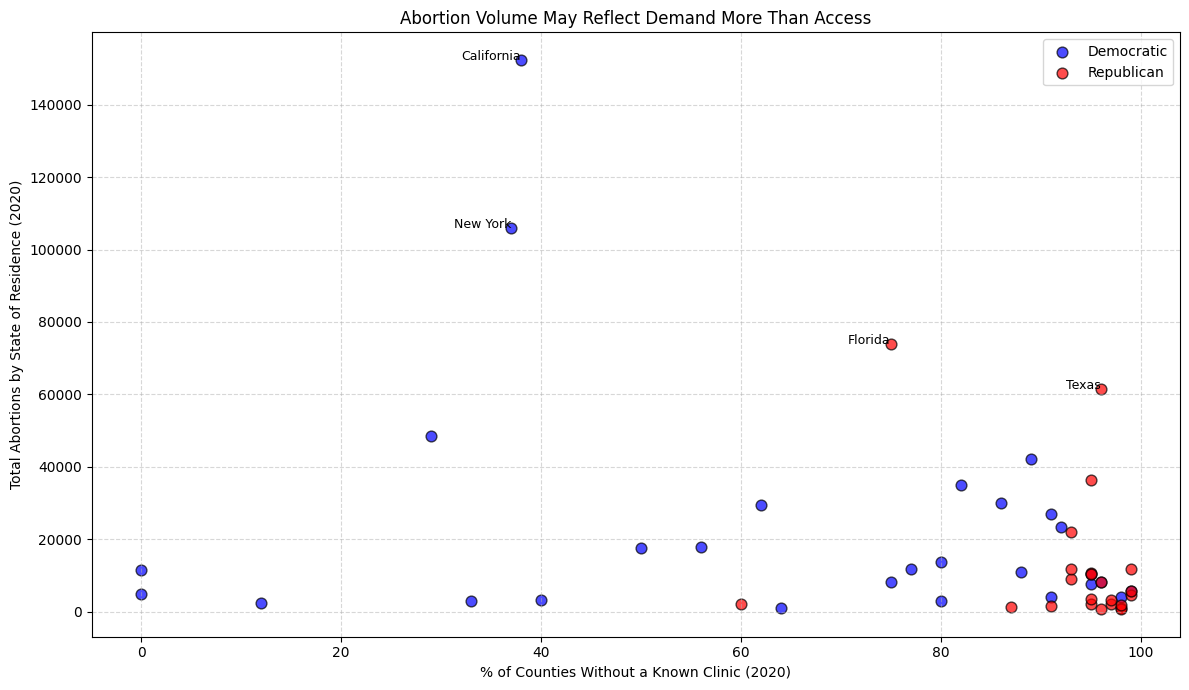

In [101]:
import matplotlib.pyplot as plt

# Filter out rows with missing values for relevant columns
df_vis = df.dropna(subset=[
    'No. of abortions, by state of residence, 2020',
    '% of counties without a known clinic, 2020',
    'Party'
])

# Color map
party_colors = {'Democratic': 'blue', 'Republican': 'red'}

# Plot
plt.figure(figsize=(12, 7))

for party in ['Democratic', 'Republican']:
    party_df = df_vis[df_vis['Party'] == party]
    plt.scatter(
        party_df['% of counties without a known clinic, 2020'],
        party_df['No. of abortions, by state of residence, 2020'],
        color=party_colors[party],
        label=party,
        edgecolor='black',
        alpha=0.7,
        s=60
    )

# Optional annotations for large states
for _, row in df_vis.iterrows():
    if row['No. of abortions, by state of residence, 2020'] > 60000:
        plt.text(row['% of counties without a known clinic, 2020'],
                 row['No. of abortions, by state of residence, 2020'],
                 row['U.S. State'],
                 fontsize=9,
                 ha='right')

plt.xlabel('% of Counties Without a Known Clinic (2020)')
plt.ylabel('Total Abortions by State of Residence (2020)')
plt.title('Abortion Volume May Reflect Demand More Than Access')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()



<Figure size 800x600 with 0 Axes>

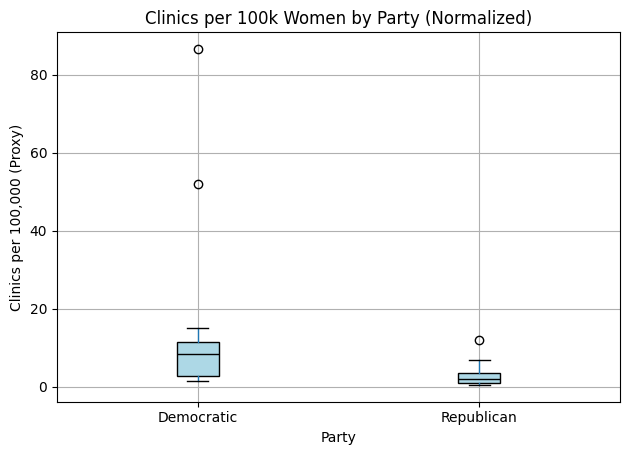

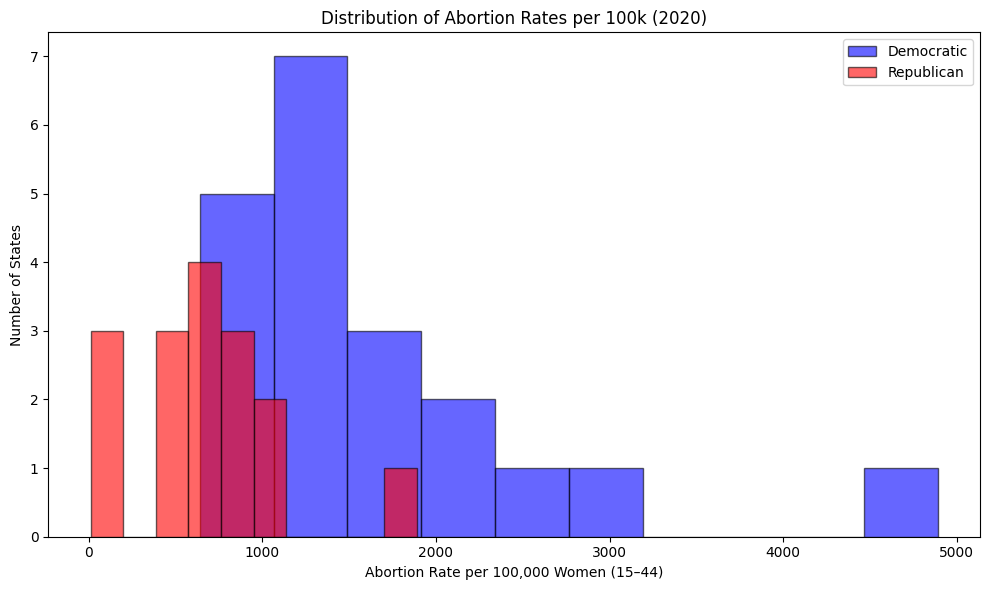

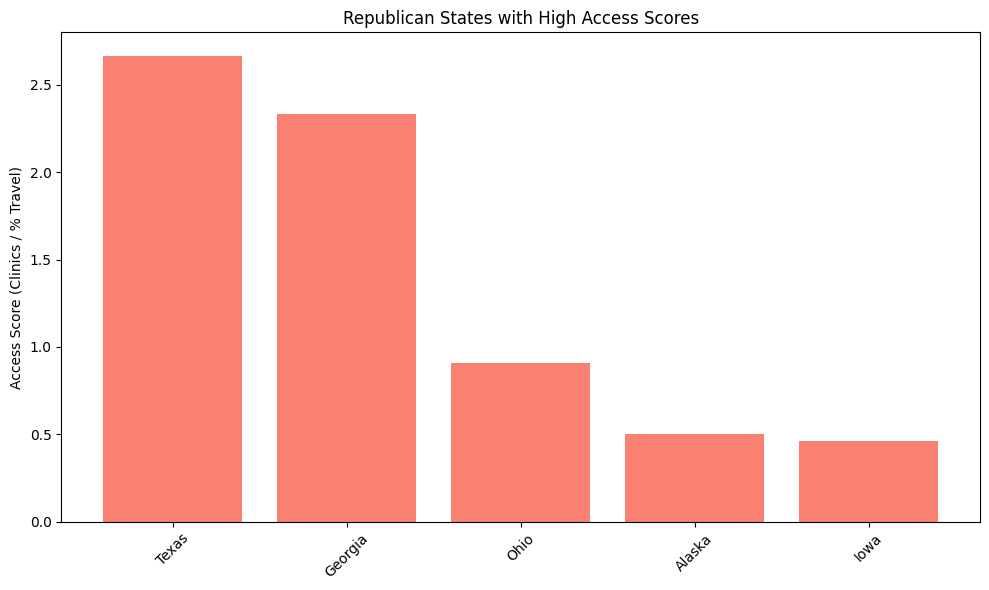

<Figure size 800x600 with 0 Axes>

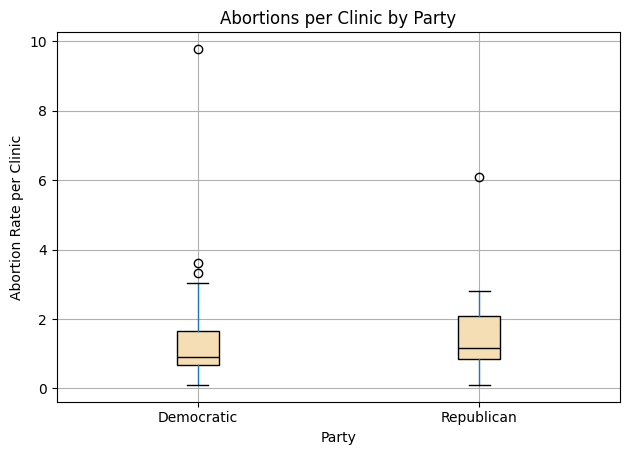

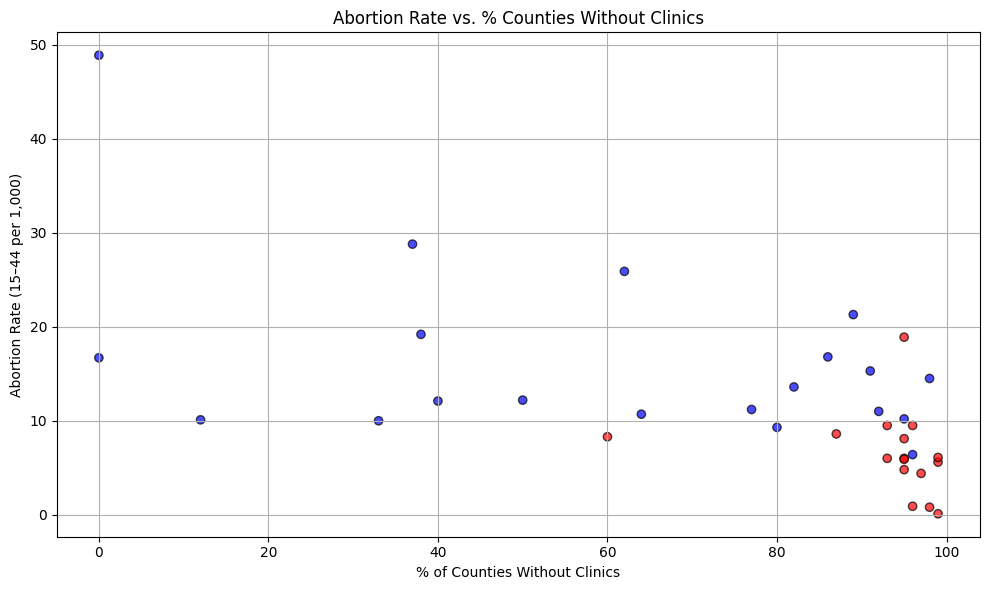

In [80]:
import matplotlib.pyplot as plt
import numpy as np

# 🟠 6. Normalize clinics per 100k women (proxy) and abortion rate per 100k
df_ideology['Clinics_per_100k'] = df_ideology['Clinics_2020'] / 2  # proxy for per 100k women
df_ideology['Abortion_Rate_per_100k'] = df_ideology['Abortion_Rate_15_44'] * 100  # convert per 1k to per 100k

# Boxplot: Clinics per 100k women by Party
plt.figure(figsize=(8, 6))
df_ideology.boxplot(column='Clinics_per_100k', by='Party',
                    patch_artist=True,
                    boxprops=dict(facecolor='lightblue'),
                    medianprops=dict(color='black'))
plt.title("Clinics per 100k Women by Party (Normalized)")
plt.suptitle("")
plt.ylabel("Clinics per 100,000 (Proxy)")
plt.tight_layout()
plt.show()

# 🟡 7. Distribution: Abortion Rate per 100k Women
dem = df_ideology[df_ideology['Party'] == 'Democratic']['Abortion_Rate_per_100k']
rep = df_ideology[df_ideology['Party'] == 'Republican']['Abortion_Rate_per_100k']

plt.figure(figsize=(10, 6))
plt.hist(dem, bins=10, alpha=0.6, label='Democratic', color='blue', edgecolor='black')
plt.hist(rep, bins=10, alpha=0.6, label='Republican', color='red', edgecolor='black')
plt.title("Distribution of Abortion Rates per 100k (2020)")
plt.xlabel("Abortion Rate per 100,000 Women (15–44)")
plt.ylabel("Number of States")
plt.legend()
plt.tight_layout()
plt.show()

# 🟢 8. Top Republican States by Access Score (Clinics / Travel %)
rep_access = df_ideology[df_ideology['Party'] == 'Republican'].copy()
rep_access['Access_Score'] = rep_access['Clinics_2020'] / (rep_access['Pct_Travel_OutOfState'] + 1)  # avoid divide by 0
top_rep = rep_access.sort_values('Access_Score', ascending=False).head(5)

plt.figure(figsize=(10, 6))
plt.bar(top_rep['State'], top_rep['Access_Score'], color='salmon')
plt.title("Republican States with High Access Scores")
plt.ylabel("Access Score (Clinics / % Travel)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 🔵 9. Abortions per Clinic by Party
df_ideology['Abortions_per_Clinic'] = df_ideology['Abortion_Rate_15_44'] / df_ideology['Clinics_2020']
df_valid = df_ideology.replace([np.inf, -np.inf], np.nan).dropna(subset=['Abortions_per_Clinic'])

plt.figure(figsize=(8, 6))
df_valid.boxplot(column='Abortions_per_Clinic', by='Party',
                 patch_artist=True,
                 boxprops=dict(facecolor='wheat'),
                 medianprops=dict(color='black'))
plt.title("Abortions per Clinic by Party")
plt.suptitle("")
plt.ylabel("Abortion Rate per Clinic")
plt.tight_layout()
plt.show()

# 🟣 10. % Counties Without Clinics vs. Abortion Rate
plt.figure(figsize=(10, 6))
colors = df_ideology['Party'].map({'Democratic': 'blue', 'Republican': 'red'})
plt.scatter(df_ideology['Pct_No_Clinic_Counties'], df_ideology['Abortion_Rate_15_44'],
            c=colors, edgecolor='black', alpha=0.7)
plt.title("Abortion Rate vs. % Counties Without Clinics")
plt.xlabel("% of Counties Without Clinics")
plt.ylabel("Abortion Rate (15–44 per 1,000)")
plt.grid(True)
plt.tight_layout()
plt.show()



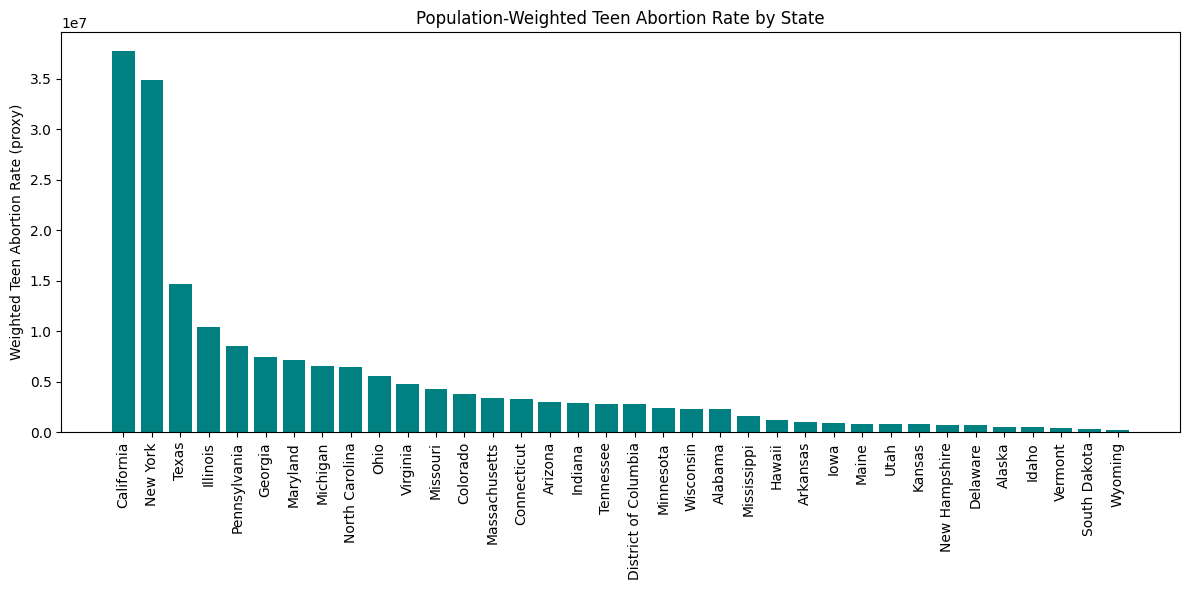

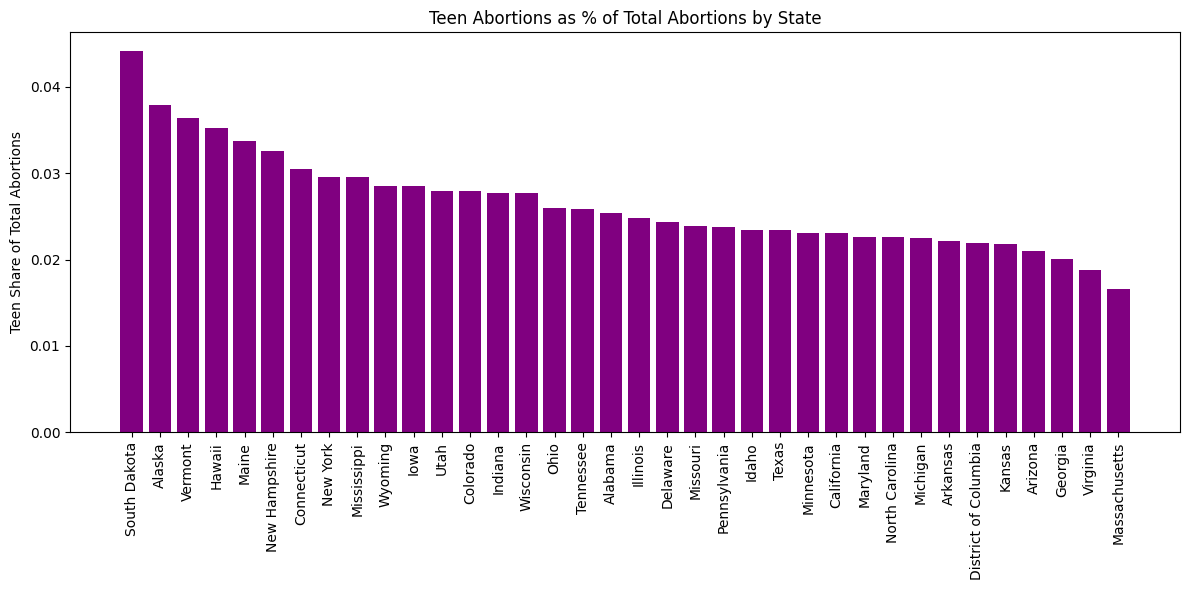

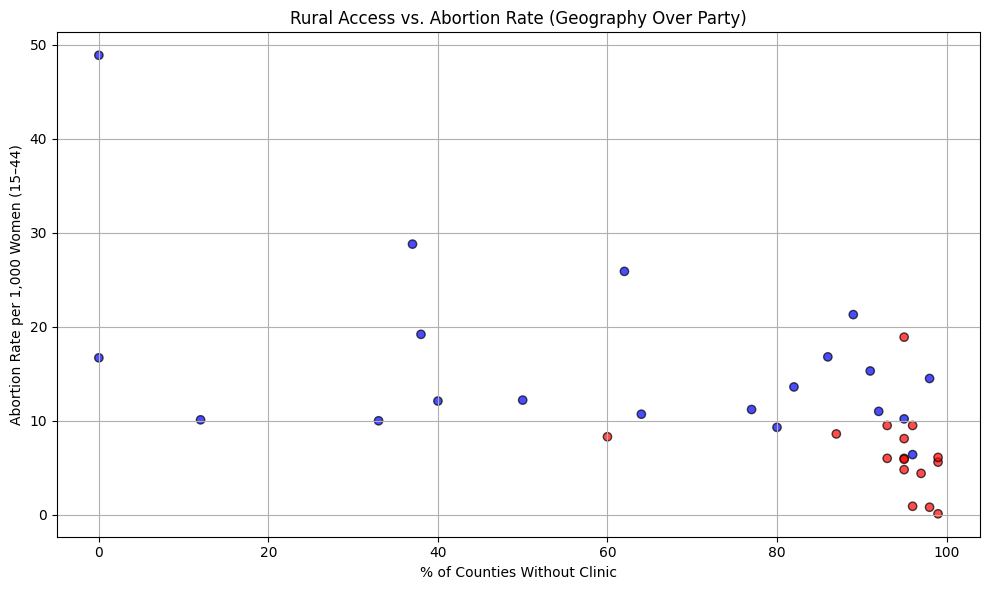

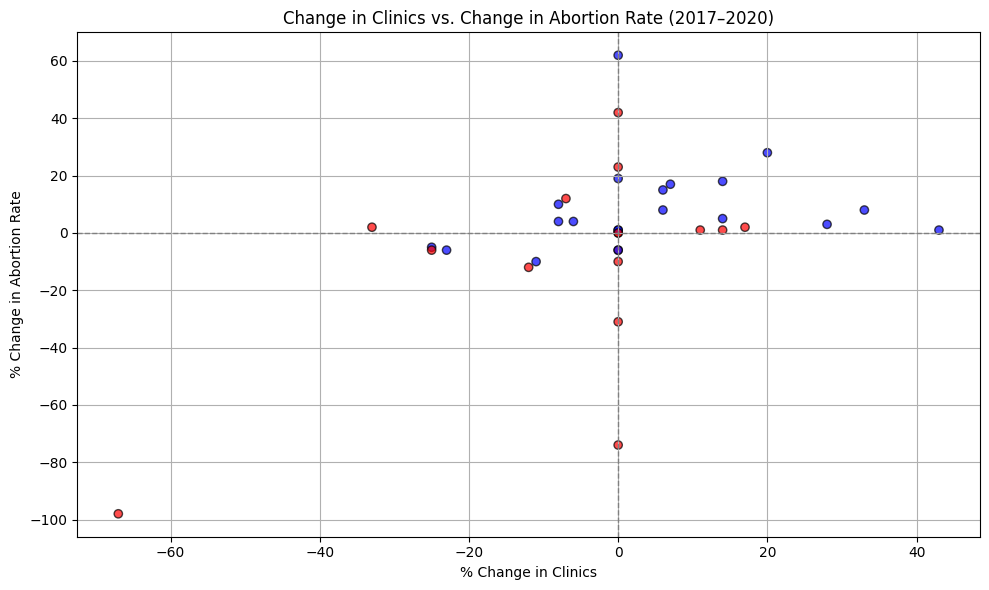

In [84]:
f = pd.read_excel('/Users/evelynzhang/Downloads/GuttmacherInstituteAbortionDataByState.xlsx', engine='openpyxl')
df=f
# Remove leading/trailing spaces from column names
df.columns = df.columns.str.strip()

# Identify columns that should be numeric (all except these)
non_numeric_cols = ['U.S. State', 'Party']
numeric_cols = [col for col in df.columns if col not in non_numeric_cols]

# Convert all numeric-looking columns to actual numbers
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')  # 'Unavailable' becomes NaN





# Add a party control map (as of 2020 presidential election or recent governor)
party_map = {
    'Alabama': 'Republican', 'Alaska': 'Republican', 'Arizona': 'Democratic', 'Arkansas': 'Republican',
    'California': 'Democratic', 'Colorado': 'Democratic', 'Connecticut': 'Democratic', 'Delaware': 'Democratic',
    'Florida': 'Republican', 'Georgia': 'Republican', 'Hawaii': 'Democratic', 'Idaho': 'Republican',
    'Illinois': 'Democratic', 'Indiana': 'Republican', 'Iowa': 'Republican', 'Kansas': 'Democratic',
    'Kentucky': 'Democratic', 'Louisiana': 'Democratic', 'Maine': 'Democratic', 'Maryland': 'Democratic',
    'Massachusetts': 'Democratic', 'Michigan': 'Democratic', 'Minnesota': 'Democratic', 'Mississippi': 'Republican',
    'Missouri': 'Republican', 'Montana': 'Republican', 'Nebraska': 'Republican', 'Nevada': 'Democratic',
    'New Hampshire': 'Republican', 'New Jersey': 'Democratic', 'New Mexico': 'Democratic', 'New York': 'Democratic',
    'North Carolina': 'Democratic', 'North Dakota': 'Republican', 'Ohio': 'Republican', 'Oklahoma': 'Republican',
    'Oregon': 'Democratic', 'Pennsylvania': 'Democratic', 'Rhode Island': 'Democratic', 'South Carolina': 'Republican',
    'South Dakota': 'Republican', 'Tennessee': 'Republican', 'Texas': 'Republican', 'Utah': 'Republican',
    'Vermont': 'Democratic', 'Virginia': 'Democratic', 'Washington': 'Democratic', 'West Virginia': 'Republican',
    'Wisconsin': 'Democratic', 'Wyoming': 'Republican', 'District of Columbia': 'Democratic'
}

# Add party column
df['Party'] = df['U.S. State'].map(party_map)


# Drop rows with critical nulls
df_new = df.copy().dropna(subset=[
    'No. of abortions, by state of occurrence, 2020',
    'No. of abortions per 1,000 women aged 15–44, by state of occurrence, 2020',
    'Abortion rate (the no. of abortions per 1,000 women aged 15-17), by state of residence, 2017',
    'No. of abortions among women aged 15-17, by state of residence, 2017',
    'No. of abortions, by state of residence, 2020',
    '% of counties without a known clinic, 2020',
    '% change in the no. of abortion clinics, 2017-2020',
    '% change in abortion rate, 2017-2020',
    'Party'
])

# Use cleaned version of df as df_new
df_new['Pop_15_44_Est'] = df_new['No. of abortions, by state of occurrence, 2020'] / (
    df_new['No. of abortions per 1,000 women aged 15–44, by state of occurrence, 2020'] / 1000
)

# 1. Weighted teen abortion rate by estimated population
df_new['Weighted_Teen_Rate'] = df_new['Abortion rate (the no. of abortions per 1,000 women aged 15-17), by state of residence, 2017'] * df_new['Pop_15_44_Est']

sorted_df = df_new.sort_values('Weighted_Teen_Rate', ascending=False)

plt.figure(figsize=(12, 6))
plt.bar(sorted_df['U.S. State'], sorted_df['Weighted_Teen_Rate'], color='teal')
plt.xticks(rotation=90)
plt.ylabel("Weighted Teen Abortion Rate (proxy)")
plt.title("Population-Weighted Teen Abortion Rate by State")
plt.tight_layout()
plt.show()

# 2. Teen Share of Abortions
df_new['Teen_Share'] = df_new['No. of abortions among women aged 15-17, by state of residence, 2017'] / df_new['No. of abortions, by state of residence, 2020']

df_clean = df_new.replace([np.inf, -np.inf], np.nan).dropna(subset=['Teen_Share'])
df_sorted = df_clean.sort_values('Teen_Share', ascending=False)

plt.figure(figsize=(12, 6))
plt.bar(df_sorted['U.S. State'], df_sorted['Teen_Share'], color='purple')
plt.xticks(rotation=90)
plt.ylabel("Teen Share of Total Abortions")
plt.title("Teen Abortions as % of Total Abortions by State")
plt.tight_layout()
plt.show()

# 3. Urbanization Proxy: % Counties Without Clinic vs. Abortion Rate
plt.figure(figsize=(10, 6))
colors = df_new['Party'].map({'Democratic': 'blue', 'Republican': 'red'})
plt.scatter(df_new['% of counties without a known clinic, 2020'],
            df_new['No. of abortions per 1,000 women aged 15–44, by state of occurrence, 2020'],
            c=colors, edgecolor='black', alpha=0.7)
plt.title("Rural Access vs. Abortion Rate (Geography Over Party)")
plt.xlabel("% of Counties Without Clinic")
plt.ylabel("Abortion Rate per 1,000 Women (15–44)")
plt.grid(True)
plt.tight_layout()
plt.show()

# 4. Time Trend: Clinic Change vs. Abortion Rate Change (2017–2020)
plt.figure(figsize=(10, 6))
colors = df_new['Party'].map({'Democratic': 'blue', 'Republican': 'red'})
plt.scatter(df_new['% change in the no. of abortion clinics, 2017-2020'],
            df_new['% change in abortion rate, 2017-2020'],
            c=colors, edgecolor='black', alpha=0.7)
plt.axhline(0, color='gray', linestyle='--', linewidth=1)
plt.axvline(0, color='gray', linestyle='--', linewidth=1)
plt.title("Change in Clinics vs. Change in Abortion Rate (2017–2020)")
plt.xlabel("% Change in Clinics")
plt.ylabel("% Change in Abortion Rate")
plt.grid(True)
plt.tight_layout()
plt.show()


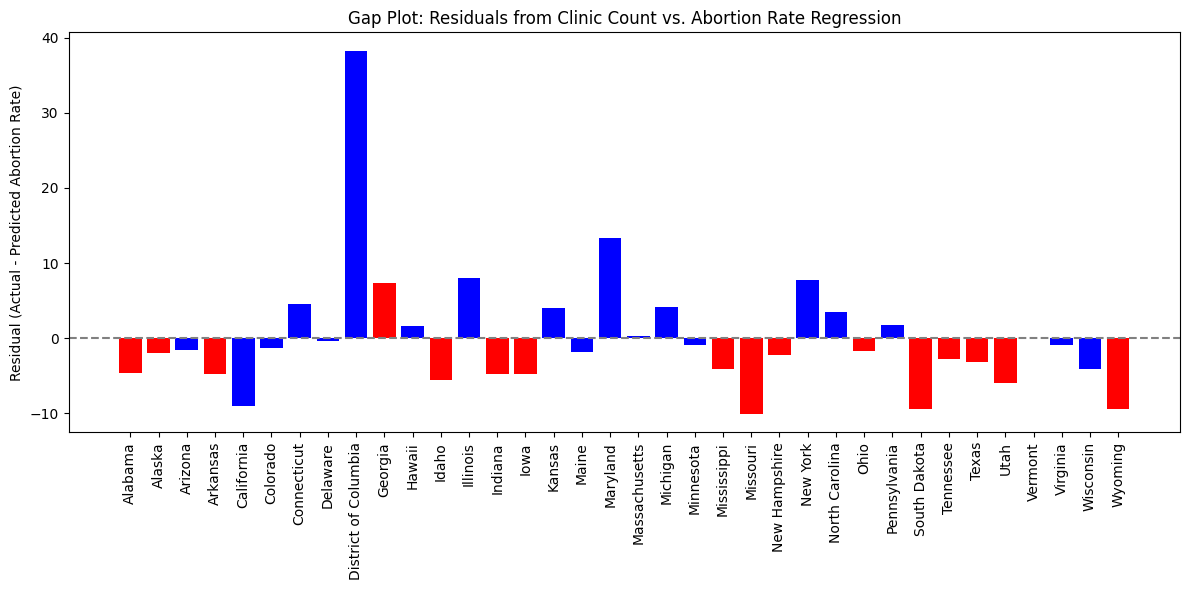

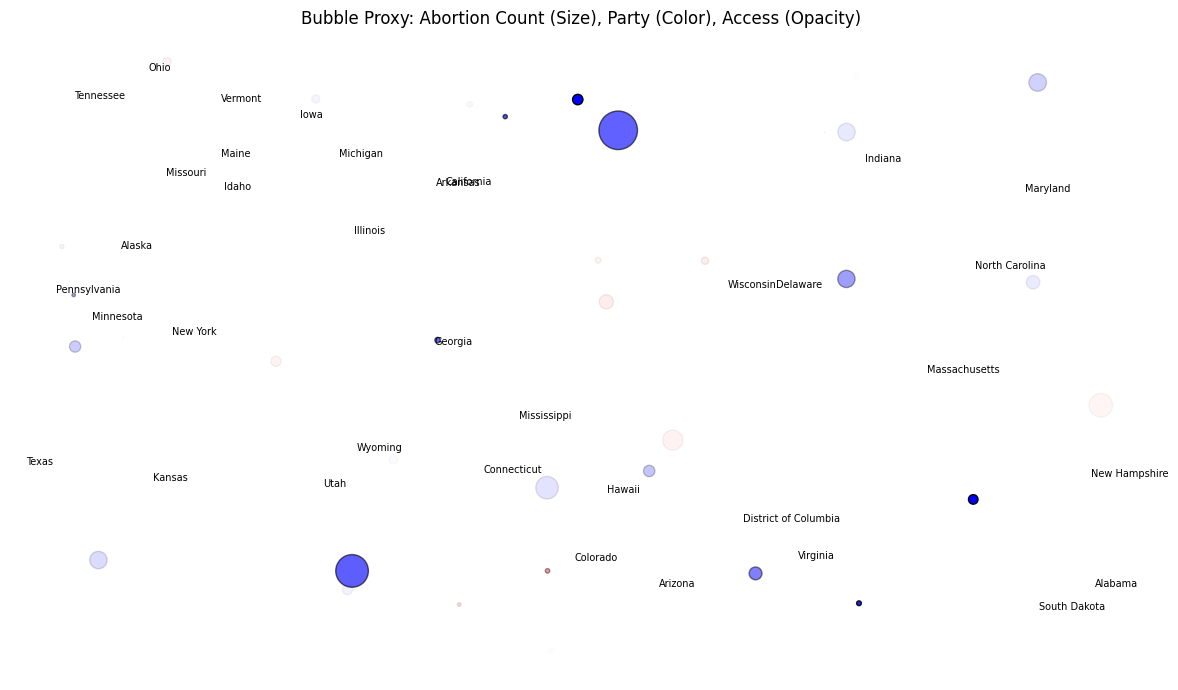

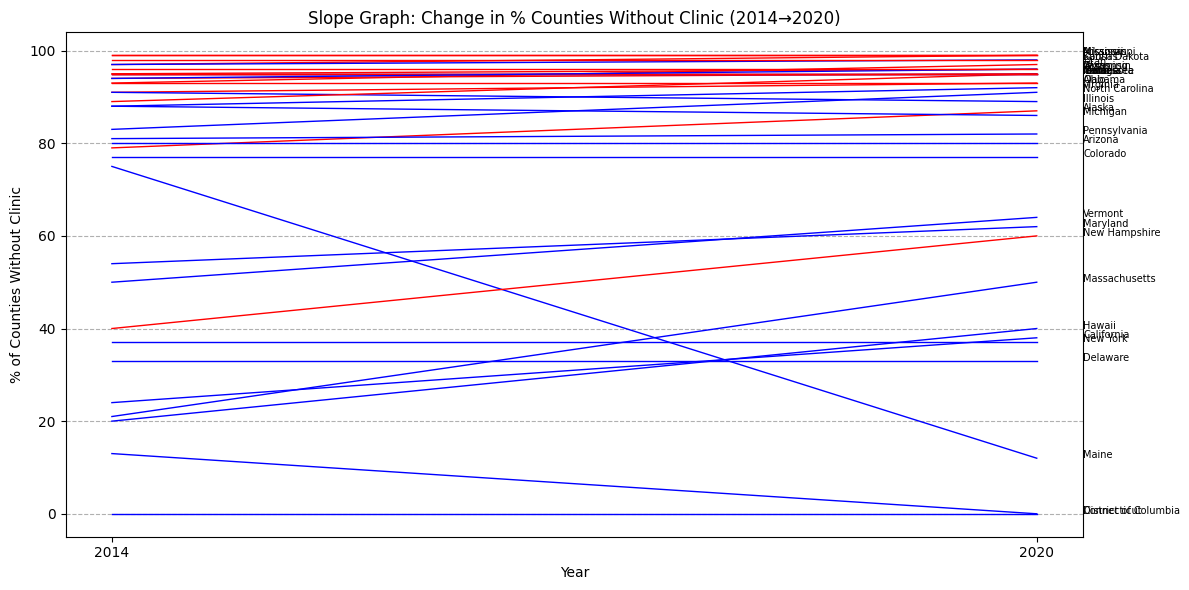

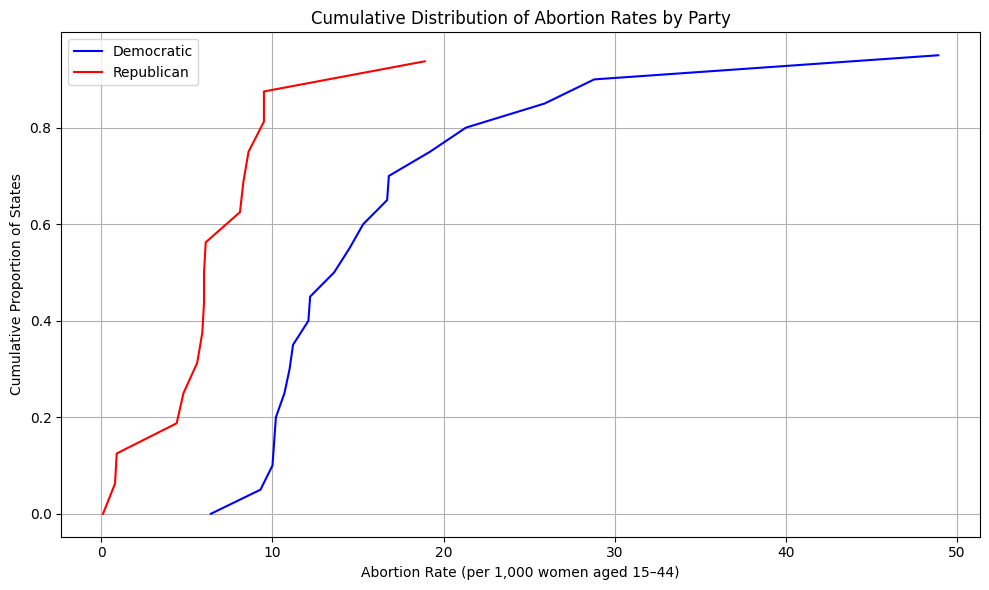

In [85]:
f = pd.read_excel('/Users/evelynzhang/Downloads/GuttmacherInstituteAbortionDataByState.xlsx', engine='openpyxl')
df=f
# Remove leading/trailing spaces from column names
df.columns = df.columns.str.strip()

# Identify columns that should be numeric (all except these)
non_numeric_cols = ['U.S. State', 'Party']
numeric_cols = [col for col in df.columns if col not in non_numeric_cols]

# Convert all numeric-looking columns to actual numbers
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')  # 'Unavailable' becomes NaN





# Add a party control map (as of 2020 presidential election or recent governor)
party_map = {
    'Alabama': 'Republican', 'Alaska': 'Republican', 'Arizona': 'Democratic', 'Arkansas': 'Republican',
    'California': 'Democratic', 'Colorado': 'Democratic', 'Connecticut': 'Democratic', 'Delaware': 'Democratic',
    'Florida': 'Republican', 'Georgia': 'Republican', 'Hawaii': 'Democratic', 'Idaho': 'Republican',
    'Illinois': 'Democratic', 'Indiana': 'Republican', 'Iowa': 'Republican', 'Kansas': 'Democratic',
    'Kentucky': 'Democratic', 'Louisiana': 'Democratic', 'Maine': 'Democratic', 'Maryland': 'Democratic',
    'Massachusetts': 'Democratic', 'Michigan': 'Democratic', 'Minnesota': 'Democratic', 'Mississippi': 'Republican',
    'Missouri': 'Republican', 'Montana': 'Republican', 'Nebraska': 'Republican', 'Nevada': 'Democratic',
    'New Hampshire': 'Republican', 'New Jersey': 'Democratic', 'New Mexico': 'Democratic', 'New York': 'Democratic',
    'North Carolina': 'Democratic', 'North Dakota': 'Republican', 'Ohio': 'Republican', 'Oklahoma': 'Republican',
    'Oregon': 'Democratic', 'Pennsylvania': 'Democratic', 'Rhode Island': 'Democratic', 'South Carolina': 'Republican',
    'South Dakota': 'Republican', 'Tennessee': 'Republican', 'Texas': 'Republican', 'Utah': 'Republican',
    'Vermont': 'Democratic', 'Virginia': 'Democratic', 'Washington': 'Democratic', 'West Virginia': 'Republican',
    'Wisconsin': 'Democratic', 'Wyoming': 'Republican', 'District of Columbia': 'Democratic'
}

# Add party column
df['Party'] = df['U.S. State'].map(party_map)

df_new = df.dropna(subset=[
    'No. of abortion clinics, 2020',
    'No. of abortions, by state of occurrence, 2020',
    'No. of abortions per 1,000 women aged 15–44, by state of occurrence, 2020',
    'Abortion rate (the no. of abortions per 1,000 women aged 15-17), by state of residence, 2017',
    'No. of abortions among women aged 15-17, by state of residence, 2017',
    'No. of abortions, by state of residence, 2020',
    '% of counties without a known clinic, 2020',
    '% of counties without a known abortion provider, 2014',
    '% change in the no. of abortion clinics, 2017-2020',
    '% change in abortion rate, 2017-2020',
    'Party'
])
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

# 2. GAP PLOT - Regression residuals (clinic count vs. abortion rate)
df_reg = df_new.dropna(subset=['No. of abortion clinics, 2020', 'No. of abortions per 1,000 women aged 15–44, by state of occurrence, 2020'])
X = df_reg[['No. of abortion clinics, 2020']]
y = df_reg['No. of abortions per 1,000 women aged 15–44, by state of occurrence, 2020']

model = LinearRegression().fit(X, y)
df_reg['Predicted_Rate'] = model.predict(X)
df_reg['Residual'] = y - df_reg['Predicted_Rate']

colors = df_reg['Party'].map({'Democratic': 'blue', 'Republican': 'red'})

plt.figure(figsize=(12, 6))
plt.axhline(0, linestyle='--', color='gray')
plt.bar(df_reg['U.S. State'], df_reg['Residual'], color=colors)
plt.xticks(rotation=90)
plt.ylabel("Residual (Actual - Predicted Abortion Rate)")
plt.title("Gap Plot: Residuals from Clinic Count vs. Abortion Rate Regression")
plt.tight_layout()
plt.show()

# 3. STATE BUBBLE MAP (simplified scatter version, not actual US map)
plt.figure(figsize=(12, 7))
bubble_df = df_new.dropna(subset=[
    'No. of abortions, by state of occurrence, 2020',
    'Party',
    '% of counties without a known clinic, 2020'
])
colors = bubble_df['Party'].map({'Democratic': 'blue', 'Republican': 'red'})
opacity = (100 - bubble_df['% of counties without a known clinic, 2020']) / 100

plt.scatter(np.random.uniform(0, 1, size=len(bubble_df)),  # fake x
            np.random.uniform(0, 1, size=len(bubble_df)),  # fake y
            s=bubble_df['No. of abortions, by state of occurrence, 2020'] / 200,
            c=colors,
            alpha=opacity, edgecolors='black')

for i, row in bubble_df.iterrows():
    plt.text(np.random.uniform(0, 1), np.random.uniform(0, 1), row['U.S. State'], fontsize=7)

plt.title("Bubble Proxy: Abortion Count (Size), Party (Color), Access (Opacity)")
plt.axis('off')
plt.tight_layout()
plt.show()

# 4. SLOPE GRAPH - Change in % counties without clinic (2014→2020)
slope_df = df_new.dropna(subset=[
    '% of counties without a known abortion provider, 2014',
    '% of counties without a known clinic, 2020'
])

plt.figure(figsize=(12, 6))
for _, row in slope_df.iterrows():
    color = 'blue' if row['Party'] == 'Democratic' else 'red'
    plt.plot([2014, 2020],
             [row['% of counties without a known abortion provider, 2014'],
              row['% of counties without a known clinic, 2020']],
             color=color, linewidth=1)
    plt.text(2020 + 0.3, row['% of counties without a known clinic, 2020'], row['U.S. State'], fontsize=7)

plt.title("Slope Graph: Change in % Counties Without Clinic (2014→2020)")
plt.xlabel("Year")
plt.ylabel("% of Counties Without Clinic")
plt.xticks([2014, 2020])
plt.grid(True, axis='y', linestyle='--')
plt.tight_layout()
plt.show()

# 5. CUMULATIVE DISTRIBUTION PLOT - Abortion Rate (by party)
plt.figure(figsize=(10, 6))
for party, color in [('Democratic', 'blue'), ('Republican', 'red')]:
    vals = np.sort(df_new[df_new['Party'] == party]['No. of abortions per 1,000 women aged 15–44, by state of occurrence, 2020'].dropna())
    cdf = np.arange(len(vals)) / len(vals)
    plt.plot(vals, cdf, label=party, color=color)

plt.title("Cumulative Distribution of Abortion Rates by Party")
plt.xlabel("Abortion Rate (per 1,000 women aged 15–44)")
plt.ylabel("Cumulative Proportion of States")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


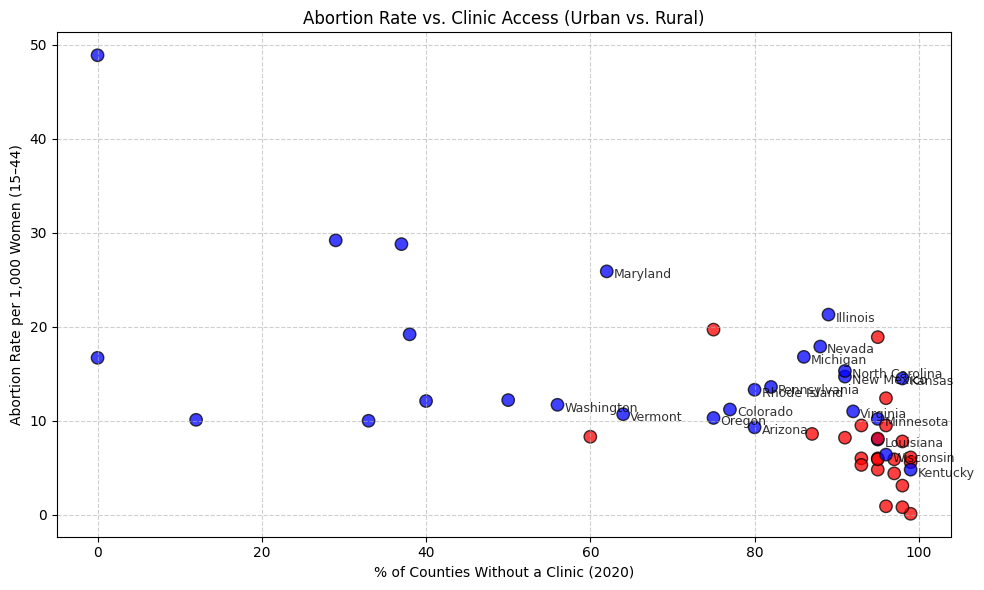

In [93]:
df_geo = df.dropna(subset=[
    '% of counties without a known clinic, 2020',
    'No. of abortions per 1,000 women aged 15–44, by state of occurrence, 2020',
    'Party'
]).copy()

# Assign colors by party
color_map = {'Democratic': 'blue', 'Republican': 'red'}
colors = df_geo['Party'].map(color_map)

# Plot
plt.figure(figsize=(10, 6))
plt.scatter(
    df_geo['% of counties without a known clinic, 2020'],
    df_geo['No. of abortions per 1,000 women aged 15–44, by state of occurrence, 2020'],
    c=colors,
    edgecolor='black',
    alpha=0.75,
    s=80
)

# Annotate Democratic states with high % no clinic & low abortion rate
for _, row in df_geo.iterrows():
    if row['Party'] == 'Democratic' and row['% of counties without a known clinic, 2020'] > 50:
        plt.annotate(row['U.S. State'],
                     (row['% of counties without a known clinic, 2020'],
                      row['No. of abortions per 1,000 women aged 15–44, by state of occurrence, 2020']),
                     fontsize=9, alpha=0.8, xytext=(5, -5), textcoords='offset points')

# Labels and aesthetics
plt.xlabel('% of Counties Without a Clinic (2020)')
plt.ylabel('Abortion Rate per 1,000 Women (15–44)')
plt.title('Abortion Rate vs. Clinic Access (Urban vs. Rural)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()



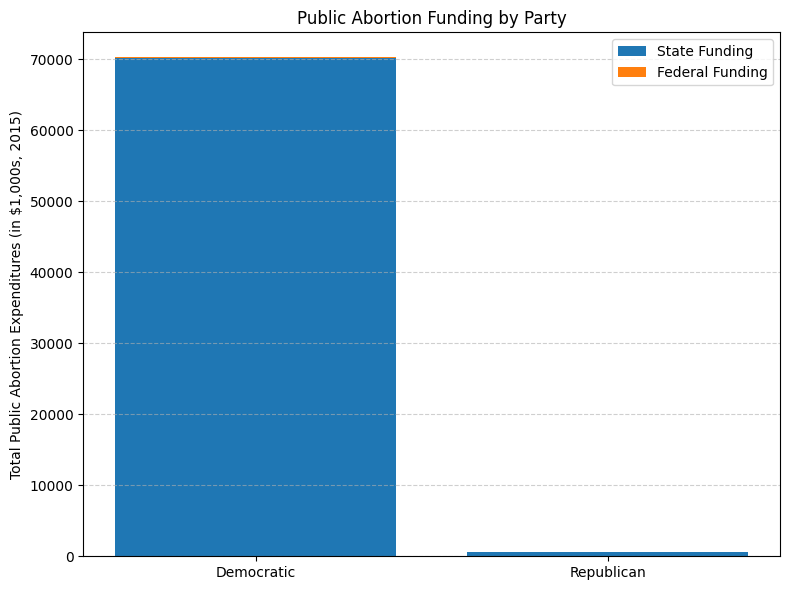

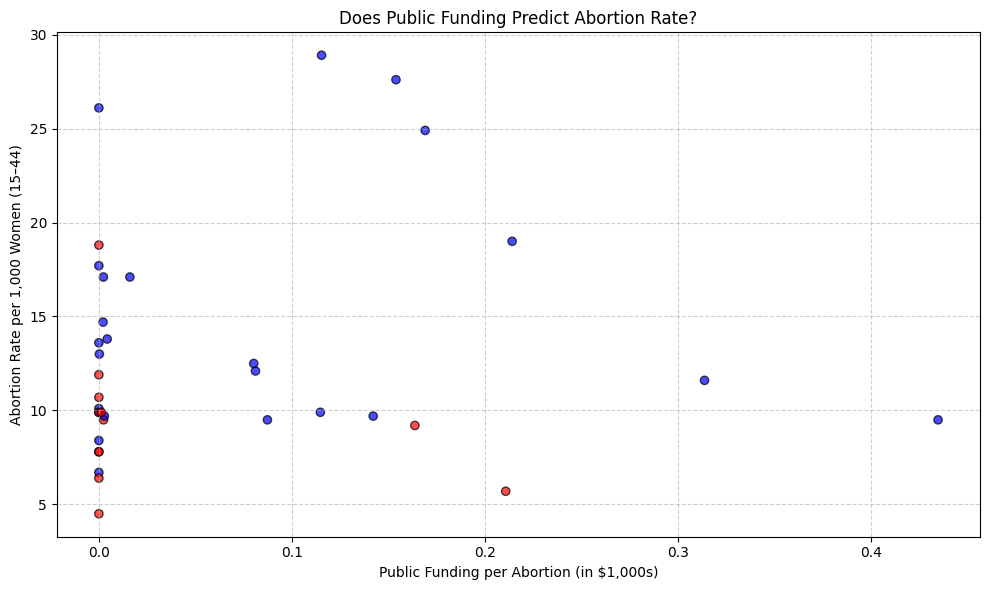

In [102]:
import pandas as pd
import matplotlib.pyplot as plt

# Filter and clean relevant columns
df_funding = df.copy()
df_funding = df_funding.dropna(subset=[
    'Reported public expenditures for abortions (in 000s of dollars), state, 2015',
    'Reported public expenditures for abortions (in 000s of dollars), federal, 2015',
    'No. of abortions, by state of residence, 2020',
    'Party'
])

# Convert columns to numeric
df_funding['state_funding'] = pd.to_numeric(df_funding['Reported public expenditures for abortions (in 000s of dollars), state, 2015'], errors='coerce')
df_funding['federal_funding'] = pd.to_numeric(df_funding['Reported public expenditures for abortions (in 000s of dollars), federal, 2015'], errors='coerce')
df_funding['total_abortions'] = pd.to_numeric(df_funding['No. of abortions, by state of residence, 2020'], errors='coerce')

# Normalize: funding per abortion (in thousands of dollars)
df_funding['funding_per_abortion'] = (df_funding['state_funding'] + df_funding['federal_funding']) / df_funding['total_abortions']

# --- Plot 1: Stacked bar chart of federal vs. state funding by Party (summed) ---
grouped = df_funding.groupby('Party')[['state_funding', 'federal_funding']].sum()

plt.figure(figsize=(8, 6))
bar1 = plt.bar(grouped.index, grouped['state_funding'], label='State Funding')
bar2 = plt.bar(grouped.index, grouped['federal_funding'], bottom=grouped['state_funding'], label='Federal Funding')

plt.ylabel("Total Public Abortion Expenditures (in $1,000s, 2015)")
plt.title("Public Abortion Funding by Party")
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# --- Plot 2: Scatter plot of funding per abortion vs. abortion rate ---
df_funding = df_funding.dropna(subset=['funding_per_abortion', 'No. of abortions per 1,000 women aged 15–44, by state of residence, 2020'])
x = df_funding['funding_per_abortion']
y = df_funding['No. of abortions per 1,000 women aged 15–44, by state of residence, 2020']
colors = df_funding['Party'].map({'Democratic': 'blue', 'Republican': 'red'})

plt.figure(figsize=(10, 6))
plt.scatter(x, y, c=colors, edgecolor='black', alpha=0.7)
plt.xlabel("Public Funding per Abortion (in $1,000s)")
plt.ylabel("Abortion Rate per 1,000 Women (15–44)")
plt.title("Does Public Funding Predict Abortion Rate?")
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()



NameError: name 'Line2D' is not defined

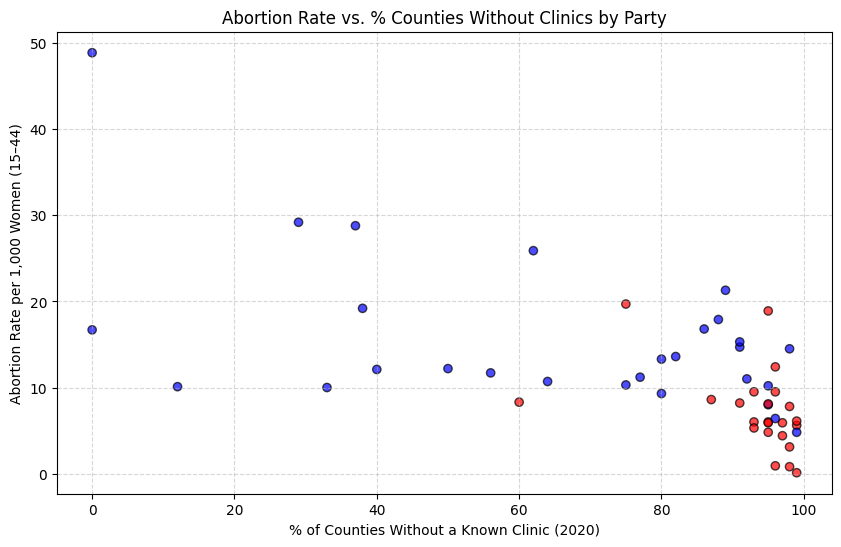

In [96]:
# Filter necessary columns and drop missing values
cols = [
    'U.S. State',
    '% of counties without a known clinic, 2020',
    'No. of abortions per 1,000 women aged 15–44, by state of occurrence, 2020',
    'Party'
]
df_scatter = df[cols].dropna()

# Rename for convenience
df_scatter.columns = ['State', 'Pct_No_Clinics', 'Abortion_Rate_15_44', 'Party']

# Plot
plt.figure(figsize=(10, 6))
colors = df_scatter['Party'].map({'Democratic': 'blue', 'Republican': 'red'})

plt.scatter(df_scatter['Pct_No_Clinics'], df_scatter['Abortion_Rate_15_44'],
            c=colors, edgecolor='black', alpha=0.7)

plt.xlabel('% of Counties Without a Known Clinic (2020)')
plt.ylabel('Abortion Rate per 1,000 Women (15–44)')
plt.title('Abortion Rate vs. % Counties Without Clinics by Party')
plt.grid(True, linestyle='--', alpha=0.5)

# Add legend
legend_elements = [
    Line2D([0], [0], marker='o', color='w', label='Democratic', markerfacecolor='blue', markersize=10),
    Line2D([0], [0], marker='o', color='w', label='Republican', markerfacecolor='red', markersize=10)
]
plt.legend(handles=legend_elements)

plt.tight_layout()
plt.show()



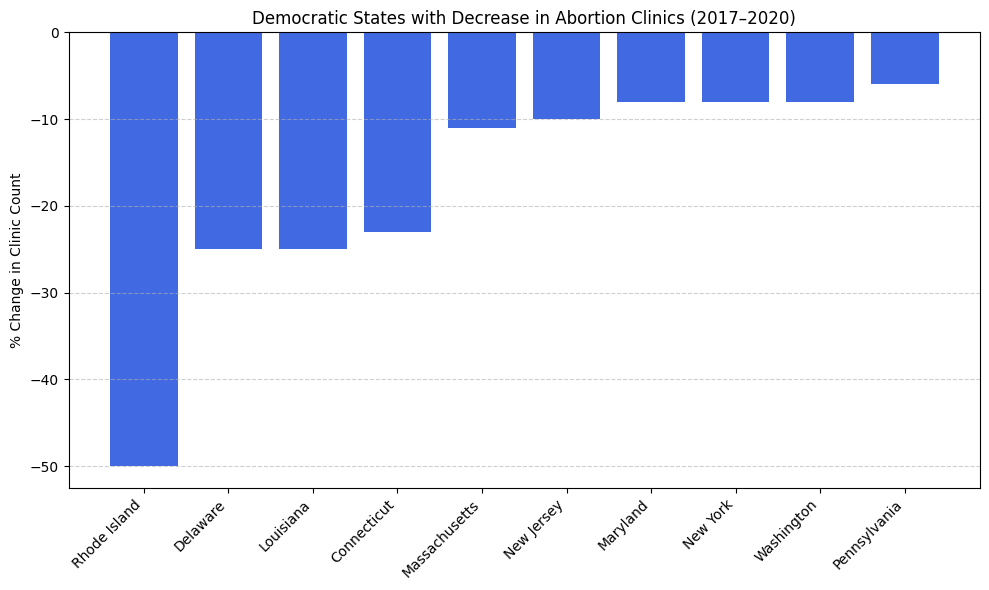

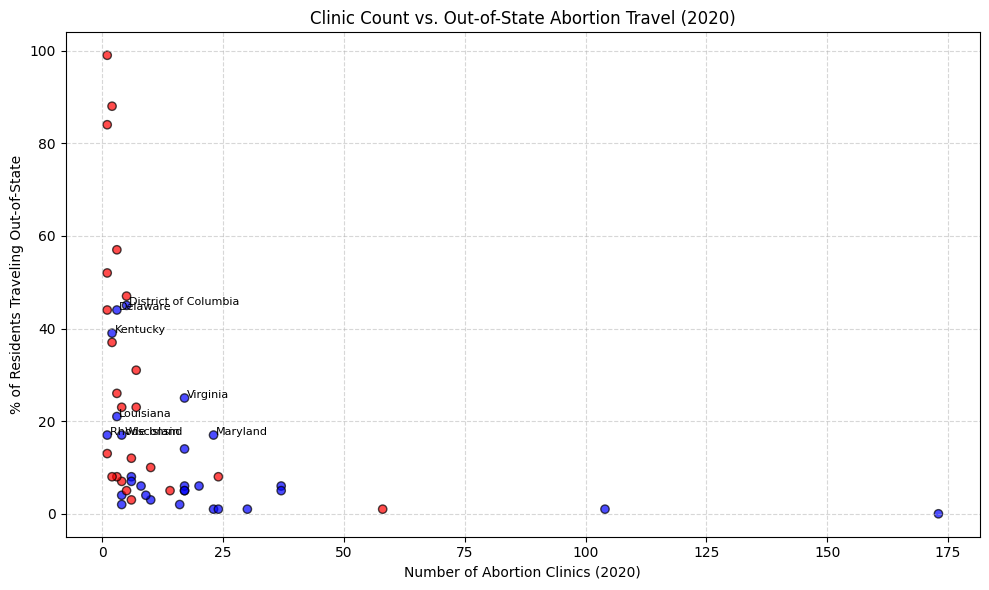

In [97]:
df_filtered = df.copy()
df_filtered = df_filtered.dropna(subset=[
    '% change in the no. of abortion clinics, 2017-2020',
    '% of residents obtaining abortions who traveled out of state for care, 2020',
    'No. of abortion clinics, 2020',
    'Party',
    'U.S. State'
])

# Convert columns to numeric
df_filtered['% change in the no. of abortion clinics, 2017-2020'] = pd.to_numeric(
    df_filtered['% change in the no. of abortion clinics, 2017-2020'], errors='coerce')
df_filtered['% of residents obtaining abortions who traveled out of state for care, 2020'] = pd.to_numeric(
    df_filtered['% of residents obtaining abortions who traveled out of state for care, 2020'], errors='coerce')
df_filtered['No. of abortion clinics, 2020'] = pd.to_numeric(
    df_filtered['No. of abortion clinics, 2020'], errors='coerce')

# 1. Bar chart of Democratic states with clinic declines
decline_demo = df_filtered[(df_filtered['Party'] == 'Democratic') &
                           (df_filtered['% change in the no. of abortion clinics, 2017-2020'] < 0)]
decline_demo_sorted = decline_demo.sort_values('% change in the no. of abortion clinics, 2017-2020')

plt.figure(figsize=(10, 6))
plt.bar(decline_demo_sorted['U.S. State'],
        decline_demo_sorted['% change in the no. of abortion clinics, 2017-2020'],
        color='royalblue')
plt.title("Democratic States with Decrease in Abortion Clinics (2017–2020)")
plt.ylabel("% Change in Clinic Count")
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# 2. Scatter plot of clinic count vs. % traveling out of state, highlighting blue states
plt.figure(figsize=(10, 6))

colors = df_filtered['Party'].map({'Democratic': 'blue', 'Republican': 'red'})
plt.scatter(df_filtered['No. of abortion clinics, 2020'],
            df_filtered['% of residents obtaining abortions who traveled out of state for care, 2020'],
            c=colors, edgecolor='black', alpha=0.7)

for _, row in df_filtered.iterrows():
    if row['Party'] == 'Democratic' and row['% of residents obtaining abortions who traveled out of state for care, 2020'] > 15:
        plt.text(row['No. of abortion clinics, 2020'] + 0.5,
                 row['% of residents obtaining abortions who traveled out of state for care, 2020'],
                 row['U.S. State'], fontsize=8)

plt.title("Clinic Count vs. Out-of-State Abortion Travel (2020)")
plt.xlabel("Number of Abortion Clinics (2020)")
plt.ylabel("% of Residents Traveling Out-of-State")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


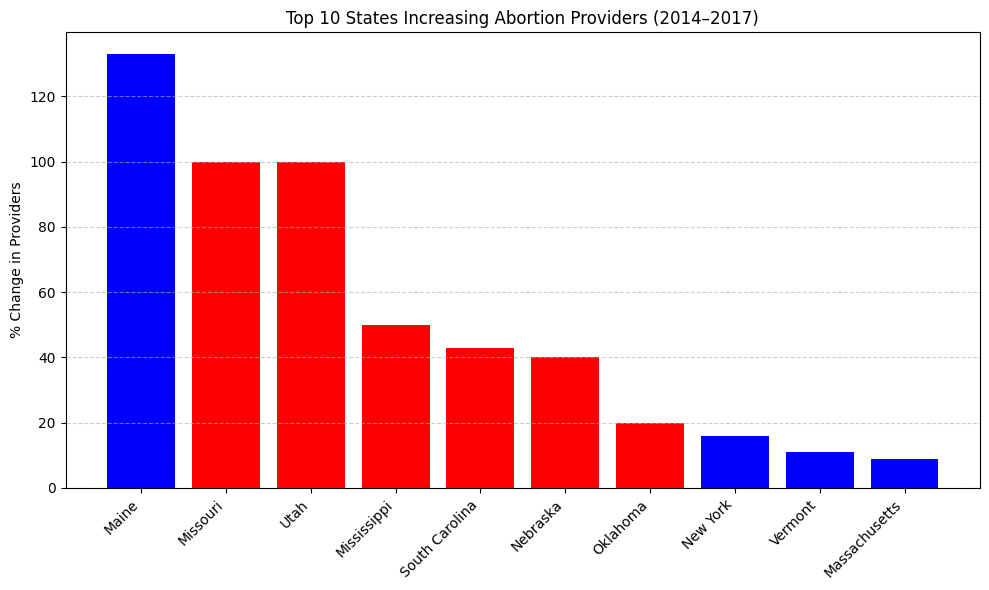

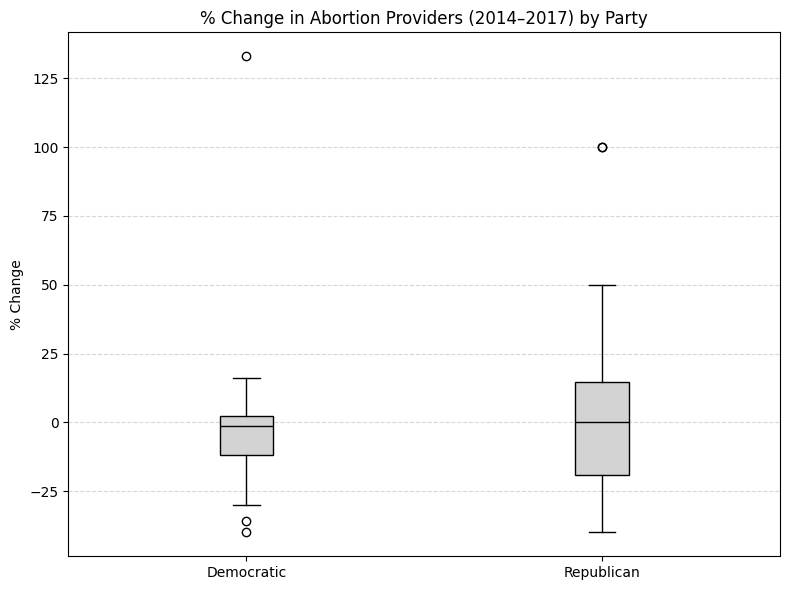

In [103]:
import pandas as pd
import matplotlib.pyplot as plt



# Clean and filter relevant column
col = '% change in the no. of abortion providers, 2014-2017'
df_providers = df.dropna(subset=[col, 'Party', 'U.S. State'])
df_providers[col] = pd.to_numeric(df_providers[col], errors='coerce')

# --- Plot 1: Top states with increase in providers grouped by Party ---
top_increases = df_providers[df_providers[col] > 0].sort_values(col, ascending=False).head(10)

plt.figure(figsize=(10, 6))
bars = plt.bar(top_increases['U.S. State'], top_increases[col],
               color=top_increases['Party'].map({'Democratic': 'blue', 'Republican': 'red'}))
plt.title("Top 10 States Increasing Abortion Providers (2014–2017)")
plt.ylabel("% Change in Providers")
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# --- Plot 2: Boxplot of % change in providers by Party ---
plt.figure(figsize=(8, 6))

parties = ['Democratic', 'Republican']
data = [df_providers[df_providers['Party'] == party][col] for party in parties]
plt.boxplot(data, labels=parties, patch_artist=True,
            boxprops=dict(facecolor='lightgray'),
            medianprops=dict(color='black'))

plt.title("% Change in Abortion Providers (2014–2017) by Party")
plt.ylabel("% Change")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


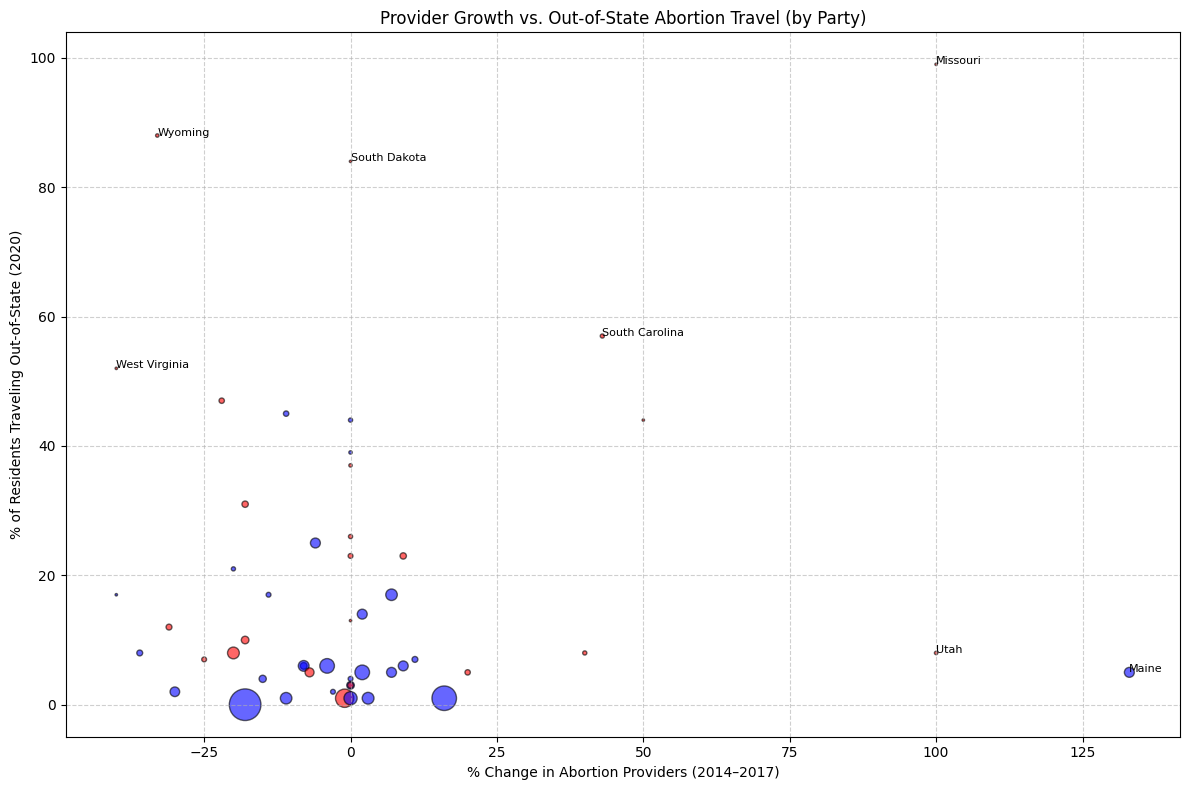

In [104]:
import matplotlib.pyplot as plt

# Filter necessary columns and drop missing values
df_bubble = df[[
    'U.S. State',
    'Party',
    '% change in the no. of abortion providers, 2014-2017',
    '% of residents obtaining abortions who traveled out of state for care, 2020',
    'No. of abortion clinics, 2020'
]].dropna()

# Map colors by party
party_colors = {'Democratic': 'blue', 'Republican': 'red'}
colors = df_bubble['Party'].map(party_colors)

# Bubble chart
plt.figure(figsize=(12, 8))
scatter = plt.scatter(
    df_bubble['% change in the no. of abortion providers, 2014-2017'],
    df_bubble['% of residents obtaining abortions who traveled out of state for care, 2020'],
    s=df_bubble['No. of abortion clinics, 2020'] * 3,
    c=colors,
    alpha=0.6,
    edgecolor='black'
)

# Labels for selected outliers
for _, row in df_bubble.iterrows():
    if abs(row['% change in the no. of abortion providers, 2014-2017']) > 75 or row['% of residents obtaining abortions who traveled out of state for care, 2020'] > 50:
        plt.text(row['% change in the no. of abortion providers, 2014-2017'],
                 row['% of residents obtaining abortions who traveled out of state for care, 2020'],
                 row['U.S. State'], fontsize=8)

plt.title("Provider Growth vs. Out-of-State Abortion Travel (by Party)")
plt.xlabel("% Change in Abortion Providers (2014–2017)")
plt.ylabel("% of Residents Traveling Out-of-State (2020)")
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()



/var/folders/vt/7gpyx6sd2jb26_2d8bcrh1740000gn/T/ipykernel_85812/759279951.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['FPro_class'] = df['FPro_class'].astype(int)


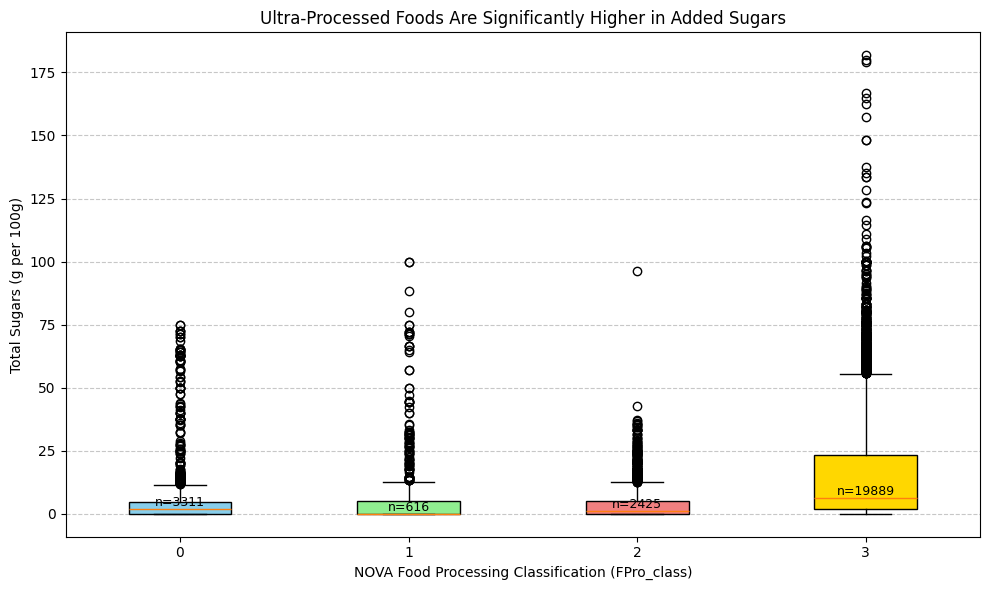

In [11]:
import pandas as pd
import matplotlib.pyplot as plt


df = df.dropna(subset=['FPro_class', 'Sugars, total'])
df['FPro_class'] = df['FPro_class'].astype(int)

classes = sorted(df['FPro_class'].unique())
data_to_plot = [df[df['FPro_class'] == cls]['Sugars, total'] for cls in classes]
counts = [len(data) for data in data_to_plot]  # count of items per category

plt.figure(figsize=(10, 6))
bp = plt.boxplot(data_to_plot, labels=[str(cls) for cls in classes], patch_artist=True)

# Color each box
colors = ['skyblue', 'lightgreen', 'lightcoral', 'gold']
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)

# Place the sample size (n=...) just above the median line of each box
for i, (median_line, count) in enumerate(zip(bp['medians'], counts)):
    # median_line.get_ydata() gives the y-coordinates of the median line
    median_y = median_line.get_ydata()[0]
    plt.text(i+1, median_y, f'n={count}', ha='center', va='bottom', fontsize=9)

plt.xlabel('NOVA Food Processing Classification (FPro_class)')
plt.ylabel('Total Sugars (g per 100g)')
plt.title('Ultra-Processed Foods Are Significantly Higher in Added Sugars')
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [16]:
df['Sodium'].describe()


count     26241.000000
mean         21.752557
std        3381.014529
min           0.000000
25%           0.063380
50%           0.300000
75%           0.550000
max      547619.047600
Name: Sodium, dtype: float64

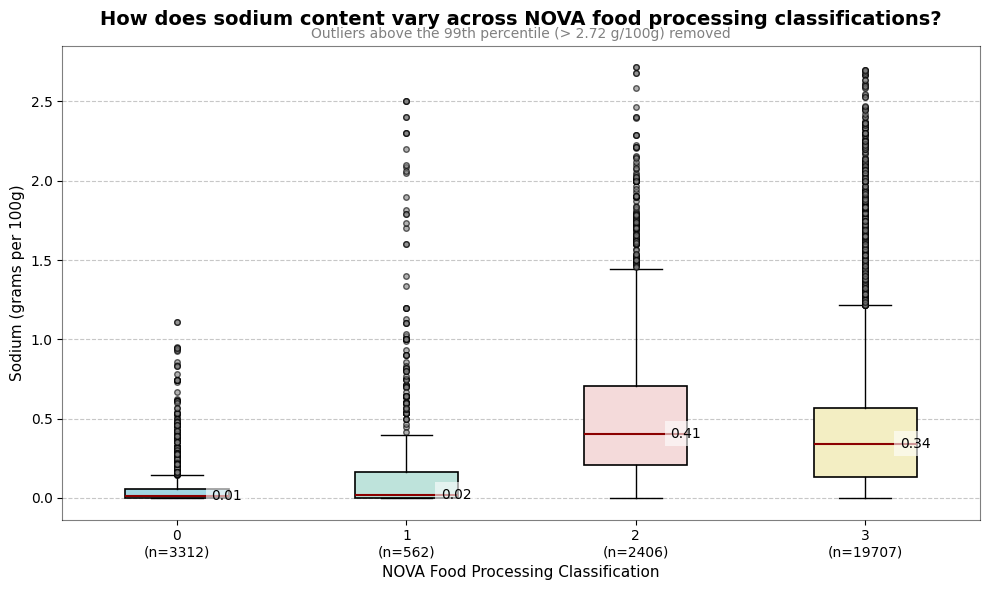

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# -----------------------------
# Data Transformations
# -----------------------------
# 1. Drop rows with missing values
df = df.dropna(subset=['FPro_class', 'Sodium'])

# 2. Convert FPro_class to int
df['FPro_class'] = pd.to_numeric(df['FPro_class'], errors='coerce')
df = df.dropna(subset=['FPro_class'])
df['FPro_class'] = df['FPro_class'].astype(int)

# 3. Filter out sodium outliers above the 99th percentile
upper_bound = df['Sodium'].quantile(0.99)
df_filtered = df[df['Sodium'] <= upper_bound]



# -----------------------------
# Prepare Data for Plotting
# -----------------------------
classes = sorted(df_filtered['FPro_class'].unique())
data_to_plot = [df_filtered[df_filtered['FPro_class'] == cls]['Sodium'] for cls in classes]

# (Optional) Compute sample sizes for each class to show on x-axis labels
sample_sizes = [len(d) for d in data_to_plot]
x_labels = [f"{cls}\n(n={size})" for cls, size in zip(classes, sample_sizes)]

# -----------------------------
# Create Figure and Axes
# -----------------------------
plt.figure(figsize=(10, 6))

# Customize boxplot appearance
boxprops = dict(linewidth=1.2, edgecolor='black')
whiskerprops = dict(color='black', linewidth=1)
capprops = dict(color='black', linewidth=1)
medianprops = dict(color='darkred', linewidth=1.5)
flierprops = dict(marker='o', markerfacecolor='gray', markersize=4, alpha=0.6)

bp = plt.boxplot(
    data_to_plot,
    labels=x_labels,
    patch_artist=True,
    boxprops=boxprops,
    whiskerprops=whiskerprops,
    capprops=capprops,
    medianprops=medianprops,
    flierprops=flierprops
)

# Define a pastel color palette for the boxes
palette = ["#A1D6E2", "#BEE3DB", "#F4DADA", "#F3EEC3"]
for patch, color in zip(bp['boxes'], palette):
    patch.set_facecolor(color)

# -----------------------------
# Title, Subtitle, and Axes
# -----------------------------
plt.title(
    "How does sodium content vary across NOVA food processing classifications?",
    fontsize=14,
    weight='bold',
    pad=15  # Extra space below the title
)

# Add a smaller, lighter subtitle below the main title
# Using the same x-position as the title (centered) but a lower y-coordinate
plt.gca().text(
    0.5,              # x = 50% of the current axes width
    1.01,             # just below the title (adjust as needed)
    f"Outliers above the 99th percentile (> {upper_bound:.2f} g/100g) removed",
    transform=plt.gca().transAxes,
    fontsize=10,
    color='gray',
    ha='center',
    va='bottom'
)

plt.xlabel("NOVA Food Processing Classification", fontsize=11)
plt.ylabel("Sodium (grams per 100g)", fontsize=11)

# Lighten the spines for a cleaner look
for spine in plt.gca().spines.values():
    spine.set_alpha(0.5)

# Add a subtle dashed grid
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

# -----------------------------
# Add Median Labels on the Side
# -----------------------------
medians = [np.median(d) for d in data_to_plot]

for i, med in enumerate(medians):
    # x-position: center of box (i+1) plus a small offset (e.g., 0.15)
    plt.text(
        i + 1.15,
        med,
        f"{med:.2f}",
        fontsize=10,
        verticalalignment='center',
        horizontalalignment='left',
        bbox=dict(facecolor='white', alpha=0.6, edgecolor='none')
    )

plt.tight_layout()
plt.show()



In [10]:
df

,name,store,category,brand,FPro,FPro_class,price,price percal,package_weight,Protein,Total Fat,Carbohydrate,"Sugars, total","Fiber, total dietary",Sodium,Cholesterol
0,Stonyfield Organic Whole Milk Strawberry Beet ...,Target,baby-food,Stonyfield,0.815250,3,5.29,0.043984,396.893000,5.050505,3.030303,12.121212,9.090909,0.000000,0.080808,0.010101
1,Stonyfield Organic Whole Milk Pear Spinach Man...,Target,baby-food,Stonyfield,0.815250,3,5.29,0.043984,396.893000,5.050505,3.030303,12.121212,9.090909,0.000000,0.080808,0.010101
2,Once Upon a Farm Organic Mama Blueberry Fruit ...,Target,baby-food,Once Upon a Farm,0.583219,3,2.79,0.055973,90.718400,1.098901,0.549451,13.186813,7.692308,2.197802,0.010989,0.000000
3,Once Upon a Farm Organic Strawberry Kids&#39; ...,Target,baby-food,Once Upon a Farm,0.451056,0,2.49,0.019213,90.718400,5.494505,7.692308,15.384615,8.791209,3.296703,0.000000,0.000000
4,Horizon Organic Growing Years Strawberry Kids&...,Target,baby-food,DANNON,0.773519,3,4.99,0.017781,396.893000,3.030303,1.010101,14.141414,6.060606,2.020202,0.050505,0.005051
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26245,"Sam's Choice Creamy Honey Almond Butter, 12 oz",Walmart,spread-squeeze,Sam's Choice,0.503963,2,4.98,0.002465,340.194000,18.750000,50.000000,25.000000,6.250000,9.375000,0.203125,0.000000
26246,"Nutella and Go Snack Packs, Hazelnut Spread & ...",Walmart,spread-squeeze,Nutella,0.738611,3,4.98,NaN,NaN,7.407407,24.074074,66.666667,40.740741,3.703704,0.000000,0.011111
26247,"Sabra Dark Chocolate Dessert Dip & Spread, 8 oz",Walmart,spread-squeeze,Sabra,0.829611,3,NaN,NaN,226.796000,3.571429,16.071429,35.714286,21.428571,3.571429,0.142857,0.000000
26248,"MaraNatha, No Stir Peanut Butter, 1.15 oz Packets",Walmart,spread-squeeze,MaraNatha,0.609444,2,0.78,0.003828,32.601925,25.000000,53.125000,15.625000,3.125000,6.250000,0.203125,0.000000


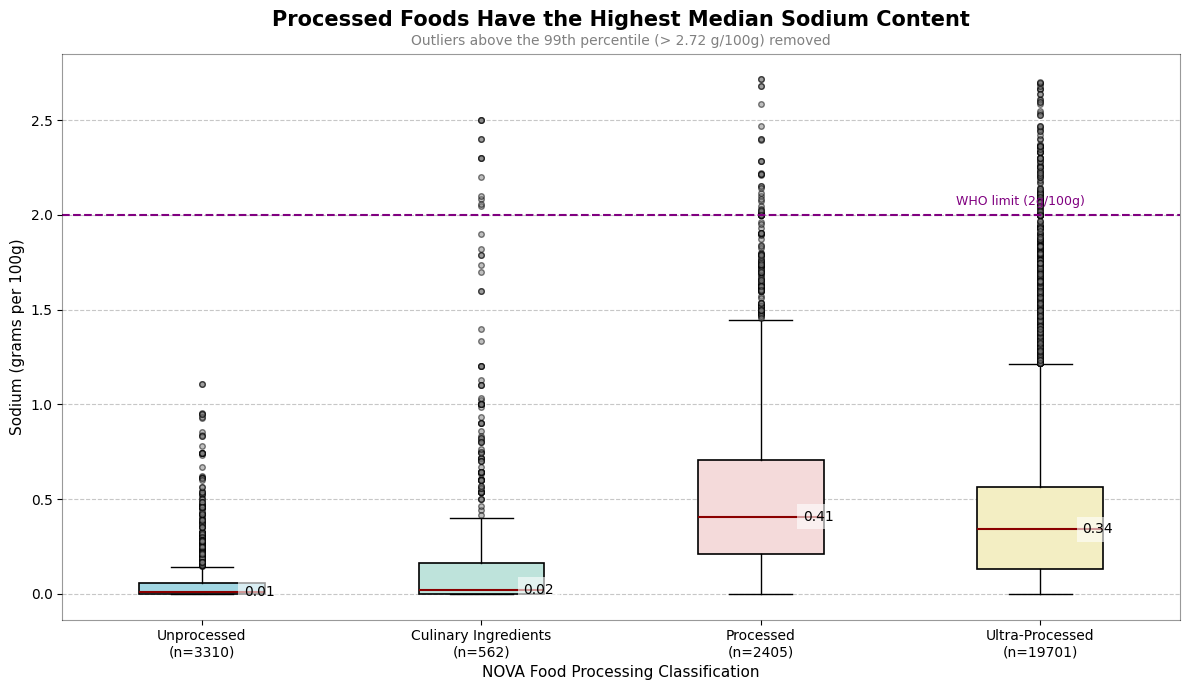

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# -----------------------------
# Data Transformations
# -----------------------------
# 1. Drop rows with missing values
df = df.dropna(subset=['FPro_class', 'Sodium'])

# 2. Convert FPro_class to int
df['FPro_class'] = pd.to_numeric(df['FPro_class'], errors='coerce')
df = df.dropna(subset=['FPro_class'])
df['FPro_class'] = df['FPro_class'].astype(int)

# 3. Remove outliers above 99th percentile
upper_bound = df['Sodium'].quantile(0.99)
df_filtered = df[df['Sodium'] <= upper_bound]

# -----------------------------
# Prepare Data for Plotting
# -----------------------------
# Label mapping for readability
label_map = {
    0: "Unprocessed",
    1: "Culinary Ingredients",
    2: "Processed",
    3: "Ultra-Processed"
}

classes = sorted(df_filtered['FPro_class'].unique())
data_to_plot = [df_filtered[df_filtered['FPro_class'] == cls]['Sodium'] for cls in classes]
sample_sizes = [len(d) for d in data_to_plot]
x_labels = [f"{label_map[cls]}\n(n={size})" for cls, size in zip(classes, sample_sizes)]

# -----------------------------
# Create Figure and Axes
# -----------------------------
plt.figure(figsize=(12, 7))

# Boxplot styling
boxprops = dict(linewidth=1.2, edgecolor='black')
whiskerprops = dict(color='black', linewidth=1)
capprops = dict(color='black', linewidth=1)
medianprops = dict(color='darkred', linewidth=1.5)
flierprops = dict(marker='o', markerfacecolor='gray', markersize=4, alpha=0.5)

# Plot the boxplot
bp = plt.boxplot(
    data_to_plot,
    labels=x_labels,
    patch_artist=True,
    boxprops=boxprops,
    whiskerprops=whiskerprops,
    capprops=capprops,
    medianprops=medianprops,
    flierprops=flierprops
)

# Set box fill colors
colors = ["#A1D6E2", "#BEE3DB", "#F4DADA", "#F3EEC3"]
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)

# -----------------------------
# Add Median Labels
# -----------------------------
medians = [np.median(d) for d in data_to_plot]
for i, med in enumerate(medians):
    plt.text(
        i + 1.15,
        med,
        f"{med:.2f}",
        fontsize=10,
        verticalalignment='center',
        horizontalalignment='left',
        bbox=dict(facecolor='white', alpha=0.6, edgecolor='none')
    )
plt.axhline(2, color='purple', linestyle='--', linewidth=1.5)
plt.text(3.7, 2.05, 'WHO limit (2g/100g)', color='purple', fontsize=9)

# -----------------------------
# Add Title, Subtitle, Labels
# -----------------------------
plt.title(
    "Processed Foods Have the Highest Median Sodium Content",
    fontsize=15,
    weight='bold',
    pad=20
)
plt.gca().text(
    0.5, 1.01,
    f"Outliers above the 99th percentile (> {upper_bound:.2f} g/100g) removed",
    transform=plt.gca().transAxes,
    fontsize=10,
    color='gray',
    ha='center',
    va='bottom'
)
plt.xlabel("NOVA Food Processing Classification", fontsize=11)
plt.ylabel("Sodium (grams per 100g)", fontsize=11)


# -----------------------------
# Clean Up Style
# -----------------------------
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
for spine in plt.gca().spines.values():
    spine.set_alpha(0.4)

plt.tight_layout()
plt.show()


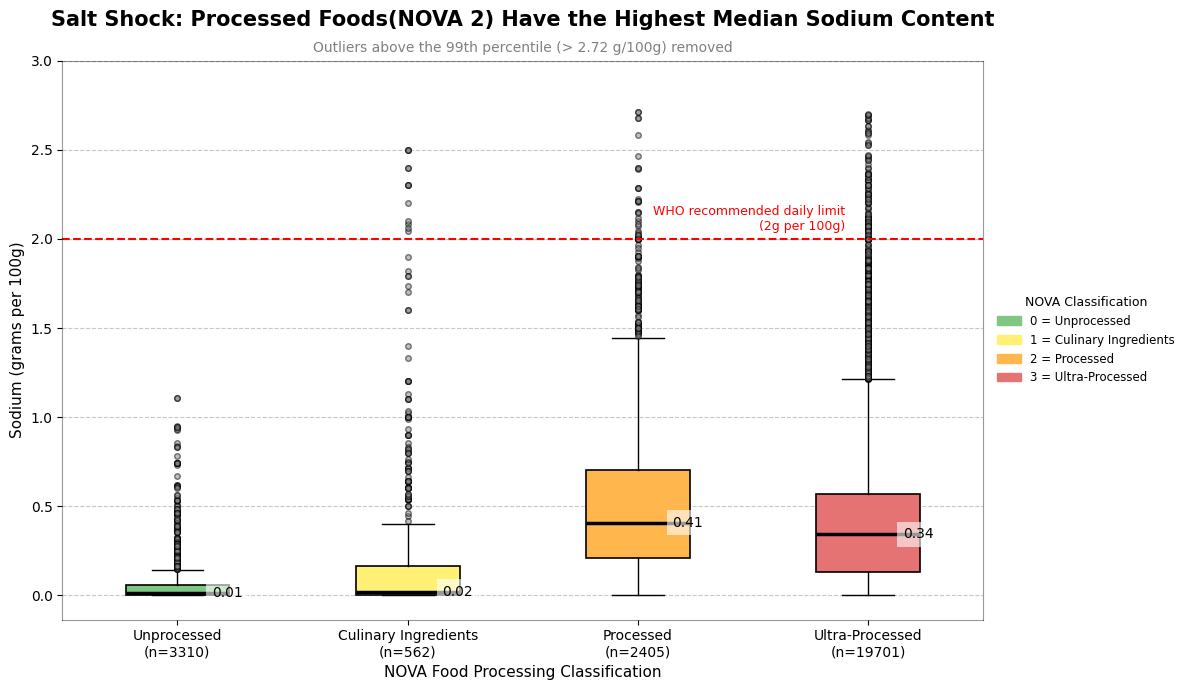

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# -----------------------------
# Data Transformations
# -----------------------------
# 1. Drop missing values
df = df.dropna(subset=['FPro_class', 'Sodium'])

# 2. Ensure FPro_class is integer
df['FPro_class'] = pd.to_numeric(df['FPro_class'], errors='coerce')
df = df.dropna(subset=['FPro_class'])
df['FPro_class'] = df['FPro_class'].astype(int)

# 3. Remove outliers above 99th percentile
upper_bound = df['Sodium'].quantile(0.99)
df_filtered = df[df['Sodium'] <= upper_bound]

# -----------------------------
# Prepare Data for Plotting
# -----------------------------
label_map = {
    0: "Unprocessed",
    1: "Culinary Ingredients",
    2: "Processed",
    3: "Ultra-Processed"
}

classes = sorted(df_filtered['FPro_class'].unique())
data_to_plot = [df_filtered[df_filtered['FPro_class'] == cls]['Sodium'] for cls in classes]
sample_sizes = [len(d) for d in data_to_plot]
x_labels = [f"{label_map[cls]}\n(n={size})" for cls, size in zip(classes, sample_sizes)]
medians = [np.median(d) for d in data_to_plot]

# -----------------------------
# Create Figure
# -----------------------------
plt.figure(figsize=(12, 7))

# Style properties
boxprops = dict(linewidth=1.2, edgecolor='black')
whiskerprops = dict(color='black', linewidth=1)
capprops = dict(color='black', linewidth=1)
medianprops = dict(color='black', linewidth=2.5)  # Thicker median line
flierprops = dict(marker='o', markerfacecolor='gray', markersize=4, alpha=0.5)

# Plot
bp = plt.boxplot(
    data_to_plot,
    labels=x_labels,
    patch_artist=True,
    boxprops=boxprops,
    whiskerprops=whiskerprops,
    capprops=capprops,
    medianprops=medianprops,
    flierprops=flierprops
)
import matplotlib.patches as mpatches

# Define category descriptions and colors
nova_legend_labels = [
    "0 = Unprocessed",
    "1 = Culinary Ingredients",
    "2 = Processed",
    "3 = Ultra-Processed"
]
nova_colors = ["#81C784", "#FFF176", "#FFB74D", "#E57373"]

# Create matching color patches
nova_patches = [mpatches.Patch(color=c, label=l) for c, l in zip(nova_colors, nova_legend_labels)]

# Add legend to the right side of the plot
plt.legend(
    handles=nova_patches,
    title="NOVA Classification",
    title_fontsize=9,
    loc='center left',
    bbox_to_anchor=(1.01, 0.5),  # Slightly outside the plot on the right
    fontsize=8.5,
    borderaxespad=0,
    frameon=False
)


# Set box fill colors based on NOVA level
palette = ["#81C784", "#FFF176", "#FFB74D", "#E57373"]  # Green to Red
for patch, color in zip(bp['boxes'], palette):
    patch.set_facecolor(color)

# -----------------------------
# Add Median Labels
# -----------------------------
for i, med in enumerate(medians):
    plt.text(
        i + 1.15,
        med,
        f"{med:.2f}",
        fontsize=10,
        verticalalignment='center',
        horizontalalignment='left',
        bbox=dict(facecolor='white', alpha=0.6, edgecolor='none')
    )

# -----------------------------
# Title and Subtitle
# -----------------------------
plt.title(
    "Salt Shock: Processed Foods(NOVA 2) Have the Highest Median Sodium Content",
    fontsize=15,
    weight='bold',
    pad=25
)


plt.gca().text(
    0.5, 1.01,
    f"Outliers above the 99th percentile (> {upper_bound:.2f} g/100g) removed",
    transform=plt.gca().transAxes,
    fontsize=10,
    color='gray',
    ha='center',
    va='bottom'
)

# -----------------------------
# WHO Guideline Line
# -----------------------------
plt.axhline(2, color='red', linestyle='--', linewidth=1.5)
plt.text(
    3.9, 2.05,
    "WHO recommended daily limit\n(2g per 100g)",
    color='red',
    fontsize=9,
    ha='right'
)

# -----------------------------
# Final Touches
# -----------------------------

plt.yticks(np.arange(0, 3.1, 0.5))  # From 0 to 3 in 0.5 steps

plt.xlabel("NOVA Food Processing Classification", fontsize=11)
plt.ylabel("Sodium (grams per 100g)", fontsize=11)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
for spine in plt.gca().spines.values():
    spine.set_alpha(0.4)

plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt



# Drop rows with missing values in 'FPro_class' or 'Sodium'
df = df.dropna(subset=['FPro_class', 'Sugars, total'])

# Ensure FPro_class is numeric and convert to integer
df['FPro_class'] = pd.to_numeric(df['FPro_class'], errors='coerce')
df = df.dropna(subset=['FPro_class'])
df['FPro_class'] = df['FPro_class'].astype(int)

# Filter out extreme sodium outliers (e.g., above the 99th percentile)
upper_bound = df['Sugars, total'].quantile(0.99)
df_filtered = df[df['Sugars, total'] <= upper_bound]

# Prepare data for the box plot by grouping sodium content by FPro_class
classes = sorted(df_filtered['FPro_class'].unique())
data_to_plot = [df_filtered[df_filtered['FPro_class'] == cls]['Sugars, total'] for cls in classes]

# Create the box plot
plt.figure(figsize=(10, 6))
bp = plt.boxplot(data_to_plot, labels=[str(cls) for cls in classes], patch_artist=True)

# Color each box for clarity
colors = ['skyblue', 'lightgreen', 'lightcoral', 'gold']
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)

# Add title, axis labels, and grid
plt.title("Ultra-Processed Foods Contain Significantly More Sugar (Filtered)")
plt.xlabel("NOVA Food Processing Classification (FPro_class)")
plt.ylabel("Sugar (grams per 100g)")
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()